In [145]:
import pandas as pd
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math

In [146]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 1500)

In [147]:
auto_text=[]

In [148]:
# function that cleans Germany's notes in the google spreadsheet cells.
def clean(item):
    try:
        if item.startswith('N/A'):
            item = np.nan
    except:
        pass
    return item

#function to read csv's (if it's a list of paths, it returns a list of dataframes)
def read(paths):
    if type(paths)==list:
        list_dfs = []
        for path in paths:
            df = pd.read_csv(path)
            df = df.applymap(lambda x: clean(x))
            #convert 
            df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
            list_dfs.append(df)
        return list_dfs
    else:
        df = pd.read_csv(paths)
        # clean strings from dataset
        df = df.applymap(lambda x: clean(x))
        # convert strings to numbers
        df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
        return df

In [149]:
type(['one','two'])==list

True

In [150]:
#url dataset 1.1
one_1 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbjKuY8nj2OVl-fvtxLaEWs2ubMPzZaaFIA4_8k6Nh5Wi1nYmKh7QKhlPWpnKLGw1EGu2LhflRKwqM/pub?gid=1746378177&single=true&output=csv'

In [151]:
#url dataset 1.2
one_2 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbjKuY8nj2OVl-fvtxLaEWs2ubMPzZaaFIA4_8k6Nh5Wi1nYmKh7QKhlPWpnKLGw1EGu2LhflRKwqM/pub?gid=822247758&single=true&output=csv'

In [152]:
# save 9Β - Women victims of homicide total (aged 18 and over) column title to homicides variable
# {'Indicator 9 - Women victims of intimate partner femicide (aged 18 and over) committed by a male intimate partner (aged 18 and over) - number as part of total homicides':"vic_intimate_violence"}
homicides = '9Β - Women victims of homicide total (aged 18 and over) '

In [153]:
#read 1.2
indicators = read(one_2)

In [154]:
indicators.head(2)

Country  YEAR  indicator 1 - Annual number of women (aged 18 and over) victims of intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f)   indicator 2 - Annual number of REPORTED ofences related to intimate partner violence against women committed by men (aged 18 and over)\nIPV reported ofences (f)  indicator 3 - 3 - Annual number of men (aged 18 and over) perpetrators of intimate partner violence against women (and percentage of male population that are perpetrators)\nIPV perpetrators (m)  indicator 4 - Annual number of women (aged 18 and over) victims of physical intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) – physical  indicator 5 - Annual number of women (aged 18 and over) victims of psychological intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) – psychological  \
0  Austria  2014                                            10061.0                                                                                                                                                                     9904.0                                                                                                                                                               NaN                                                                                                                                                                                             5785.0                                                                                                                                                                                        4049.0                                                                                                                                                        
1  Austria  2015                                            10529.0                                                                                                                                                                    10297.0                                                                                                                                                               NaN                                                                                                                                                                                             6172.0                                                                                                                                                                                        4150.0                                                                                                                                                        

   indicator 6 - Annual number of women (aged 18 and over) victims of sexual intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) – sexual  indicator 7 - Annual number of women (aged 18 and over) victims of economic intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) – economic  indicator 8 - Annual number of women (aged 18 and over) victims reporting rape committed by men (aged 18 and over), as recorded by police\nRape victims (f)  Indicator 9 - Women victims of intimate partner femicide (aged 18 and over) committed by a male intimate partner (aged 18 and over) - number as part of total homicides  9Β - Women victims of homicide total (aged 18 and over)  pct of femicides to female homicide victims  indicator 10 - Annual number of protection orders applied for and granted in cases of intimate partner violence against women - IPV protection orders  \
0                                              221.0                                                                                                                                                                                

In [155]:
#columns to be renamed
cols = {"indicator 1 - Annual number of women (aged 18 and over) victims of intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) ":"vic_intimate_violence", "indicator 2 - Annual number of REPORTED ofences related to intimate partner violence against women committed by men (aged 18 and over)\nIPV reported ofences (f)":"reported_offences_int_violence", 'indicator 3 - 3 - Annual number of men (aged 18 and over) perpetrators of intimate partner violence against women (and percentage of male population that are perpetrators)\nIPV perpetrators (m)':'men_perpetrators_int_violence', 'indicator 4 - Annual number of women (aged 18 and over) victims of physical intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) – physical':'physical_violence',"indicator 5 - Annual number of women (aged 18 and over) victims of psychological intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) – psychological":"psychological_violence","indicator 6 - Annual number of women (aged 18 and over) victims of sexual intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) – sexual":"sexual_violence","indicator 7 - Annual number of women (aged 18 and over) victims of economic intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) – economic":"economic_violence","indicator 8 - Annual number of women (aged 18 and over) victims reporting rape committed by men (aged 18 and over), as recorded by police\nRape victims (f)":"rape_victims",'Indicator 9 - Women victims of intimate partner femicide (aged 18 and over) committed by a male intimate partner (aged 18 and over) - number as part of total homicides':'femicides','9Β - Women victims of homicide total (aged 18 and over) ':'homicide_total','indicator 10 - Annual number of protection orders applied for and granted in cases of intimate partner violence against women - IPV protection orders':'protection_orders','indicator 11 - Annual number of men (aged 18 and over) prosecuted for intimate partner violence against women\nIPV prosecuted (m)':'men_prosecuted_for_int_violence','indicator 12 - Annual number of men (aged 18 and over) sentenced for intimate partner violence against women\nIPV sentenced (m)':'men_sentenced','indicator 13 - Annual number of men (aged 18 and over) sentenced for intimate partner violence against women held in prison or with a sanction involving a form of deprivation of liberty\nIPV held in prison (m)':'men_held_in_prison'}

In [156]:
#rename columns
indicators.rename(columns=cols,inplace = True)

In [157]:
#path of female population EUROSTAT - saved locally
female_pop = '/Users/atroboukis/Google Drive/iMEdD/PROJECTS/FEMICIDES/female_pop.csv'

In [158]:
# read 1.1
data = read(one_1)

In [159]:
data.head(2)

country_code  Country  Year  Population   Deaths  Female deaths  Female assaults deaths  Intentional female homicides Collected by    Source Unnamed: 10
0           AT  Austria  2011     8375164  76142.0        39758.0                    21.0                          35.0         MIIR  Eurostat         NaN
1           AT  Austria  2012     8408121  78961.0        41803.0                    21.0                          38.0         MIIR  Eurostat         NaN

In [160]:
# read female population dataset
fpop = read(female_pop)

In [161]:
fpop.rename(columns={'OBS_VALUE':'female_population'},inplace=True)

In [162]:
fpop.head()

DATAFLOW        LAST UPDATE freq unit    age sex geo  TIME_PERIOD  female_population OBS_FLAG
0  ESTAT:DEMO_PJAN(1.0)  22/06/22 23:00:00    A   NR  TOTAL   F  AD         2012            38252.0      NaN
1  ESTAT:DEMO_PJAN(1.0)  22/06/22 23:00:00    A   NR  TOTAL   F  AD         2013            37408.0      NaN
2  ESTAT:DEMO_PJAN(1.0)  22/06/22 23:00:00    A   NR  TOTAL   F  AD         2019            37388.0      NaN
3  ESTAT:DEMO_PJAN(1.0)  22/06/22 23:00:00    A   NR  TOTAL   F  AL         2012          1444234.0      NaN
4  ESTAT:DEMO_PJAN(1.0)  22/06/22 23:00:00    A   NR  TOTAL   F  AL         2013          1437193.0      NaN

In [163]:
# group female deatshs dataset by location and year. 
fpop = fpop.groupby(['geo','TIME_PERIOD']).female_population.sum().reset_index()

In [164]:
fpop.head()

geo  TIME_PERIOD  female_population
0  AD         2012            38252.0
1  AD         2013            37408.0
2  AD         2019            37388.0
3  AL         2012          1444234.0
4  AL         2013          1437193.0

In [165]:
# add female population into the 1.1 dataset
df = pd.merge(data, fpop, how='left', left_on=['country_code','Year'],right_on=['geo','TIME_PERIOD'])

In [166]:
# merge 1.2 to 1.1 on country and Year
df = pd.merge(df, indicators, how='left', left_on=['Country','Year'],right_on=['Country','YEAR'])

In [167]:
df.columns

Index(['country_code', 'Country', 'Year', 'Population', 'Deaths', 'Female deaths', 'Female assaults deaths', 'Intentional female homicides', 'Collected by_x', 'Source_x', 'Unnamed: 10', 'geo', 'TIME_PERIOD', 'female_population', 'YEAR', 'vic_intimate_violence', 'reported_offences_int_violence', 'men_perpetrators_int_violence', 'physical_violence', 'psychological_violence', 'sexual_violence', 'economic_violence', 'rape_victims', 'femicides', 'homicide_total', 'pct of femicides to female homicide victims', 'protection_orders', 'men_prosecuted_for_int_violence', 'men_sentenced', 'men_held_in_prison', 'Collected by_y', 'Source_y', 'Link', 'NOTES'], dtype='object')

In [168]:
# select columns we need for analysis
df = df[['country_code', 'Country', 'Year', 'Population','female_population', 'Deaths',
       'Female deaths','Female assaults deaths',
       'Intentional female homicides','vic_intimate_violence', 'reported_offences_int_violence',
       'men_perpetrators_int_violence', 'physical_violence',
       'psychological_violence', 'sexual_violence', 'economic_violence',
       'rape_victims', 'femicides', 'homicide_total',
       'pct of femicides to female homicide victims', 'protection_orders',
       'men_prosecuted_for_int_violence', 'men_sentenced',
       'men_held_in_prison']]

In [169]:
# clean
df['pct of femicides to female homicide victims'] = df['pct of femicides to female homicide victims'].str.replace('%','').astype(float)

In [170]:
df.head()

country_code  Country  Year  Population  female_population   Deaths  Female deaths  Female assaults deaths  Intentional female homicides  vic_intimate_violence  reported_offences_int_violence  men_perpetrators_int_violence  physical_violence  psychological_violence  sexual_violence  economic_violence  rape_victims  femicides  homicide_total  pct of femicides to female homicide victims  protection_orders  men_prosecuted_for_int_violence  men_sentenced  men_held_in_prison
0           AT  Austria  2011     8375164                NaN  76142.0        39758.0                    21.0                          35.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN
1           AT  Austria  2012     8408121          4309977.0  78961.0        41803.0                    21.0                          38.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN
2           AT  Austria  2013     8451860          4328238.0  79020.0        41378.0                    23.0                          30.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN
3           AT  Austria  2014     8507786          4352447.0  77940.0        40662.0                    17.0                          23.0                10061.0                          9904.0                            NaN             5785.0                  4049.0            221.0                6.0         485.0       25.0            38.0                                         66.0                NaN                              NaN            NaN                 NaN
4           AT  Austria  2015     8584926          4384529.0  83026.0        43159.0                    31.0                          17.0                10529.0                         10297.0                            NaN             6172.0                  4150.0            196.0               11.0         452.0       32.0            46.0                                         70.0                NaN                           3648.0          433.0                 NaN

# Calculations

In [171]:
# gr = df[df.Country == 'Greece'].copy()

In [172]:
# gr

In [173]:
# Function to calculate pct_change from year to year to a series of columns
# new columns will have pct_change in the column name
def pct_cng(data, column_names):
    for item in column_names:
        data[item+'_pct_change'] = round(data[item].pct_change(fill_method=None)*100,1)
#         print(item+'_pct_change')
    return data

In [174]:
# apply function to df and save new dataset to df1
df = pct_cng(df, ['Intentional female homicides','vic_intimate_violence', 'reported_offences_int_violence',
       'men_perpetrators_int_violence','physical_violence','psychological_violence', 'sexual_violence', 'economic_violence', 'rape_victims', 'femicides', 'homicide_total','protection_orders','men_prosecuted_for_int_violence', 'men_sentenced','men_held_in_prison'])

In [175]:
# Main function for the analysis
def analysis_per_X_women(data, columns, female_population, measurement):
    if type(columns)==list:
        for item in columns:
            data[item+'_per_'+str(measurement)] = round((data[item]/data[female_population])*measurement,2)
        return data
    else:
        data[columns+'_per_'+str(measurement)] = round((data[columns]/data[female_population])*measurement,2)
        return data

In [176]:
cols_to_analyse=['vic_intimate_violence', 'physical_violence', 'psychological_violence', 'sexual_violence', 'economic_violence', 'rape_victims']

In [177]:
# female victims of INTIMATE violence per 10.000 women in each country
# female victims of PHYSICAL violence per 10.000 women in each country
# female victims of PSYCHOLOGICAL violence per 10.000 women in each country
# female victims of SEXUAL violence per 10.000 women in each country
# female victims of ECONOMIC violence per 10.000 women in each country
# rape victims per 10.000 women

df = analysis_per_X_women(df,cols_to_analyse, 'female_population',10000)

In [178]:
# Femicides & homicides per 1mil women
df = analysis_per_X_women(df,['femicides', 'homicide_total'], 'female_population',1000000)

In [179]:
# Femicides per 100k female deaths
df['femicides_per_100k'] = round((df['femicides']/df['Female deaths'])*100000,1)

In [180]:
# Out of all the reported offences of intimate violence, what pct where prosecuted?
# df['pct_prosecuted_from_reported_int_violence'] = round((df['men_prosecuted_for_int_violence'].astype('float')/df['reported_offences_int_violence'].astype('float'))*100,1)

# # What % of perpetrators where they actually prosecuted?
# df['pct_prosecuted_from_perp'] = round((df['men_prosecuted_for_int_violence'].astype('float')/df['men_perpetrators_int_violence'].astype('float'))*100,1)

# What % of prosecuted where they actually sentenced?
df['pct_sentenced_from_prosecuted'] = round((df['men_sentenced'].astype('float')/df['men_prosecuted_for_int_violence'].astype('float'))*100,1)
# What % of sentenced where they actually jailed?
df['pct_prison_from_sentenced'] = round((df['men_held_in_prison'].astype('float')/df['men_sentenced'].astype('float'))*100,1)

# # What % of perpetrators where they actually jailed?
# df['pct_prison_from_perpetrators'] = round((df['men_held_in_prison'].astype('float')/df['men_perpetrators_int_violence'].astype('float'))*100,1)

# What % of perpetrators where they actually jailed?
df['pct_prison_from_prosecuted'] = round((df['men_held_in_prison'].astype('float')/df['men_prosecuted_for_int_violence'].astype('float'))*100,1)


# Reported Offences

In [181]:
# Countries with comparable data for reported offences EIGE page 32
comparable_reported_offences = ['Czechia', 'Spain', 'Croatia', 'Latvia', 'Slovenia', 'Sweden']


# Femicides

In [182]:
# Countries with comparable data for femicides - EIGE page 29, footnote 30
comparable_femicides_countries = ['Czechia', 'Germany', 'Spain', 'France', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Netherlands', 'Slovenia', 'Slovakia', 'Finland', 'Sweden']


In [183]:
# Countries with the biggest increace in femicides ALL YEARS - Malta went from 0 to 2: we hardcoded the increase to be 100%

df[df.femicides_pct_change.notna()].replace(np.inf, 100).sort_values(by='femicides_pct_change', ascending=False)[['Country','Year','femicides_pct_change']]


Country  Year  femicides_pct_change
153          Greece  2021                 187.5
354          Sweden  2018                 120.0
145          Greece  2013                 116.7
88          Estonia  2015                 100.0
246           Malta  2018                 100.0
244           Malta  2016                 100.0
150          Greece  2018                  85.7
207          Latvia  2015                  83.3
101         Finland  2016                  83.3
317        Slovakia  2017                  83.3
90          Estonia  2017                  50.0
255     Netherlands  2015                  43.8
209          Latvia  2017                  40.0
329        Slovenia  2017                  40.0
40          Croatia  2015                  37.5
198           Italy  2018                  32.1
103         Finland  2018                  28.6
5           Austria  2016                  28.1
4           Austria  2015                  28.0
102         Finland  2017                  27.3
7           Austria  2018                  25.6
331        Slovenia  2019                  25.0
316        Slovakia  2016                  20.0
140         Germany  2020                  18.8
148          Greece  2016                  18.2
357          Sweden  2021                  15.4
136         Germany  2016                  14.8
210          Latvia  2018                  14.3
65   Czech Republic  2016                  12.0
339           Spain  2015                   9.1
114          France  2017                   5.7
196           Italy  2016                   5.5
6           Austria  2017                   4.9
201           Italy  2021                   4.5
341           Spain  2017                   2.0
113          France  2016                   0.8
243           Malta  2015                   0.0
164         Hungary  2020                   0.0
308          Serbia  2020                   0.0
222       Lithuania  2018                   0.0
58           Cyprus  2021                   0.0
152          Greece  2020                   0.0
342           Spain  2018                   0.0
200           Italy  2020                  -1.5
139         Germany  2019                  -4.1
307          Serbia  2019                  -5.0
137         Germany  2017                  -5.2
165         Hungary  2021                  -5.9
219       Lithuania  2015                  -6.7
146          Greece  2014                  -7.7
67   Czech Republic  2018                  -8.0
199           Italy  2019                  -8.1
147          Greece  2015                  -8.3
256     Netherlands  2016                  -8.7
112          France  2015                  -9.0
41          Croatia  2016                  -9.1
195           Italy  2015                  -9.9
42          Croatia  2017                 -10.0
66   Czech Republic  2017                 -10.7
306          Serbia  2018                 -13.0
327        Slovenia  2015                 -14.3
257     Netherlands  2017                 -14.3
328        Slovenia  2016                 -16.7
138         Germany  2018                 -17.0
340           Spain  2016                 -18.3
356          Sweden  2020                 -18.8
64   Czech Republic  2015                 -21.9
197           Italy  2017                 -27.3
355          Sweden  2019                 -27.3
309          Serbia  2021                 -31.6
89          Estonia  2016                 -33.3
315        Slovakia  2015                 -37.5
151          Greece  2019                 -38.5
330        Slovenia  2018                 -42.9
57           Cyprus  2020                 -44.4
149          Greece  2017                 -46.2
144          Greece  2012                 -50.0
220       Lithuania  2016                 -50.0
91          Estonia  2018                 -50.0
318        Slovakia  2018                 -54.5
208          Latvia  2016                 -54.5
43          Croatia  2018                 -55.6
221       Lithuania  2017   

In [184]:
# Countries with the biggest increace in femicides FROM 2019 onward --- COVID
df[(df.femicides_pct_change.notna()) & (df['Year']>2018)].replace(np.inf, 100).sort_values(by='femicides_pct_change', ascending=False)[['Country','Year','femicides_pct_change']]


Country  Year  femicides_pct_change
153    Greece  2021                 187.5
331  Slovenia  2019                  25.0
140   Germany  2020                  18.8
357    Sweden  2021                  15.4
201     Italy  2021                   4.5
308    Serbia  2020                   0.0
152    Greece  2020                   0.0
164   Hungary  2020                   0.0
58     Cyprus  2021                   0.0
200     Italy  2020                  -1.5
139   Germany  2019                  -4.1
307    Serbia  2019                  -5.0
165   Hungary  2021                  -5.9
199     Italy  2019                  -8.1
356    Sweden  2020                 -18.8
355    Sweden  2019                 -27.3
309    Serbia  2021                 -31.6
151    Greece  2019                 -38.5
57     Cyprus  2020                 -44.4

In [185]:
# difference in official data with data from other sources
url_other_sources = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbjKuY8nj2OVl-fvtxLaEWs2ubMPzZaaFIA4_8k6Nh5Wi1nYmKh7QKhlPWpnKLGw1EGu2LhflRKwqM/pub?gid=1690417396&single=true&output=csv'
col_fem = "Number of femicides deriving from other sources (not police/government statistics, but monitor groups, ngo's, etc) - IF available and different than official records"

In [186]:
os = pd.read_csv(url_other_sources)[['Country', 'Year', col_fem]]
os.rename(columns={col_fem:'unofficial_femicides'},inplace=True)
os.head()

Country  Year  unofficial_femicides
0  Greece  2018                   NaN
1  Greece  2019                   NaN
2  Greece  2020                   NaN
3  Greece  2021                   NaN
4  Greece  2022                   NaN

In [187]:
# COMPARE OFFICIAL SOURCES WITH UNOFFICIAL
pd.merge(df[['Country','Year','femicides']],os, how='left').dropna(subset=['femicides', 'unofficial_femicides'])

Country  Year  femicides  unofficial_femicides
305  Serbia  2017       23.0                  26.0
306  Serbia  2018       20.0                  30.0
307  Serbia  2019       19.0                  26.0
308  Serbia  2020       19.0                  26.0
309  Serbia  2021       13.0                  20.0

# Intentional Murders of females - victim perp relationships

In [188]:
# Load 1.3 spreadsheet (Eurostat)
url_vic_offender_relationship = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbjKuY8nj2OVl-fvtxLaEWs2ubMPzZaaFIA4_8k6Nh5Wi1nYmKh7QKhlPWpnKLGw1EGu2LhflRKwqM/pub?gid=1910359684&single=true&output=csv'
vo=pd.read_csv(url_vic_offender_relationship)
vo.head()

Year  Country Relationship_type Victim_sex                              Unit  Value Collected by    Source                                        Source link Notes
0  2011  Austria             Total      Total                            Number    NaN         MIIR  Eurostat  Intentional homicide victims by victim-offende...   NaN
1  2011  Austria             Total      Total  Per hundred thousand inhabitants    NaN         MIIR  Eurostat  Intentional homicide victims by victim-offende...   NaN
2  2011  Austria             Total      Males                            Number    NaN         MIIR  Eurostat  Intentional homicide victims by victim-offende...   NaN
3  2011  Austria             Total      Males  Per hundred thousand inhabitants    NaN         MIIR  Eurostat  Intentional homicide victims by victim-offende...   NaN
4  2011  Austria             Total    Females                            Number    NaN         MIIR  Eurostat  Intentional homicide victims by victim-offende...   NaN

In [189]:
# keep only females and number (exclude per 100k)
vo = vo[(vo.Victim_sex=='Females')&(vo.Unit=='Number')].reset_index(drop=True)
vo

Year      Country     Relationship_type Victim_sex    Unit  Value Collected by                                             Source                                        Source link                                              Notes
0    2011      Austria                 Total    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
1    2011      Austria  Family and relatives    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
2    2011      Austria      Intimate partner    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
3    2012      Austria                 Total    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
4    2012      Austria  Family and relatives    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
5    2012      Austria      Intimate partner    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
6    2013      Austria                 Total    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
7    2013      Austria  Family and relatives    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
8    2013      Austria      Intimate partner    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
9    2014      Austria                 Total    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
10   2014      Austria  Family and relatives    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
11   2014      Austria      Intimate partner    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
12   2015      Austria                 Total    Females  Number   14.0         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
13   2015      Austria  Family and relatives    Females  Number   14.0         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
14   2015      Austria      Intimate partner    Females  Number    NaN         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                                                NaN
15   2016      Austria                 Total    Females  Number   23.0         MIIR                                           Eurostat  Intentional homicide victims by victim-offende...                            

In [190]:
# merge main dataset with victim-offender one
df_vo = pd.merge(df[['Country','Year','Intentional female homicides','female_population','Female deaths']],vo[['Country','Year','Relationship_type', 'Value']], how='left')

In [191]:
df_vo

Country  Year  Intentional female homicides  female_population  Female deaths     Relationship_type  Value
0           Austria  2011                          35.0                NaN        39758.0                 Total    NaN
1           Austria  2011                          35.0                NaN        39758.0  Family and relatives    NaN
2           Austria  2011                          35.0                NaN        39758.0      Intimate partner    NaN
3           Austria  2012                          38.0          4309977.0        41803.0                 Total    NaN
4           Austria  2012                          38.0          4309977.0        41803.0  Family and relatives    NaN
5           Austria  2012                          38.0          4309977.0        41803.0      Intimate partner    NaN
6           Austria  2013                          30.0          4328238.0        41378.0                 Total    NaN
7           Austria  2013                          30.0          4328238.0        41378.0  Family and relatives    NaN
8           Austria  2013                          30.0          4328238.0        41378.0      Intimate partner    NaN
9           Austria  2014                          23.0          4352447.0        40662.0                 Total    NaN
10          Austria  2014                          23.0          4352447.0        40662.0  Family and relatives    NaN
11          Austria  2014                          23.0          4352447.0        40662.0      Intimate partner    NaN
12          Austria  2015                          17.0          4384529.0        43159.0                 Total   14.0
13          Austria  2015                          17.0          4384529.0        43159.0  Family and relatives   14.0
14          Austria  2015                          17.0          4384529.0        43159.0      Intimate partner    NaN
15          Austria  2016                          31.0          4427918.0        41579.0                 Total   23.0
16          Austria  2016                          31.0          4427918.0        41579.0  Family and relatives   23.0
17          Austria  2016                          31.0          4427918.0        41579.0      Intimate partner    NaN
18          Austria  2017                          37.0          4460424.0        43274.0                 Total   29.0
19          Austria  2017                          37.0          4460424.0        43274.0  Family and relatives   29.0
20          Austria  2017                          37.0          4460424.0        43274.0      Intimate partner    NaN
21          Austria  2018                          44.0          4483749.0        42902.0                 Total   31.0
22          Austria  2018                          44.0          4483749.0        42902.0  Family and relatives   31.0
23          Austria  2018                          44.0          4483749.0        42902.0      Intimate partner    NaN
24          Austria  2019                          40.0          4501742.0        42454.0                 Total   21.0
25          Austria  2019                          40.0          4501742.0        42454.0  Family and relatives   21.0
26          Austria  2019                          40.0          4501742.0        42454.0      Intimate partner    NaN
27          Austria  2020                          37.0          4522292.0        45999.0                 Total   27.0
28          Austria  2020                          37.0          4522292.0        45999.0  Family and relatives   27.0
29          Austria  2020                          37.0          4522292.0        45999.0      Intimate partner    NaN
30          Austria  2021                           NaN          4535712.0            NaN                   NaN    NaN
31          Austria  2022                           NaN                NaN            NaN                   NaN    NaN
32          Belgium  2011                           NaN                NaN        530

In [192]:
# Pct of relationship between vic - offender to intentional female homicides
# NOTE: the Intentional female homicides are from EUROSTAT - as is the vic-offender dataset
df_vo['pct_fam_partner'] = round((df_vo['Value']/df_vo['Intentional female homicides'])*100,1)

In [193]:
# per 100k of female deaths
df_vo['relationshp_per_100k'] = round((df_vo['Value']/df_vo['Female deaths'])*100000,1)

In [194]:
# Sorted with pct_fam_partner
df_vo[(df_vo['pct_fam_partner']<=100)].sort_values(by='pct_fam_partner', ascending=False)

Country  Year  Intentional female homicides  female_population  Female deaths     Relationship_type  Value  pct_fam_partner  relationshp_per_100k
657     Slovenia  2021                           6.0          1049039.0        11420.0                 Total    6.0            100.0                  52.5
478        Malta  2016                           2.0           224019.0         1709.0                 Total    2.0            100.0                 117.0
480        Malta  2016                           2.0           224019.0         1709.0      Intimate partner    2.0            100.0                 117.0
642     Slovenia  2016                           2.0          1040855.0         9949.0                 Total    2.0            100.0                  20.1
643     Slovenia  2016                           2.0          1040855.0         9949.0  Family and relatives    2.0            100.0                  20.1
492        Malta  2020                           1.0           248802.0            NaN      Intimate partner    1.0            100.0                   NaN
648     Slovenia  2018                           5.0          1039839.0        10199.0                 Total    5.0            100.0                  49.0
484        Malta  2018                           4.0           235102.0         1838.0                 Total    4.0            100.0                 217.6
649     Slovenia  2018                           5.0          1039839.0        10199.0  Family and relatives    5.0            100.0                  49.0
654     Slovenia  2020                           6.0          1044795.0        12091.0                 Total    6.0            100.0                  49.6
474        Malta  2014                           1.0           214891.0         1630.0      Intimate partner    1.0            100.0                  61.3
490        Malta  2020                           1.0           248802.0            NaN                 Total    1.0            100.0                   NaN
71       Croatia  2016                          20.0          2167872.0        26397.0                 Total   18.0             90.0                  68.2
74       Croatia  2017                          18.0          2149003.0        27817.0                 Total   16.0             88.9                  57.5
522  Netherlands  2020                          44.0          8759554.0        84361.0                 Total   39.0             88.6                  46.2
68       Croatia  2015                          15.0          2186089.0        27987.0                 Total   13.0             86.7                  46.5
516  Netherlands  2018                          36.0          8654043.0        78841.0                 Total   31.0             86.1                  39.3
306      Hungary  2013                          71.0          5192845.0        64884.0  Family and relatives   61.0             85.9                  94.0
382        Italy  2020                         116.0         30591392.0       380899.0                 Total   99.0             85.3                  26.0
379        Italy  2019                         111.0         30685478.0       333897.0                 Total   94.0             84.7                  28.2
658     Slovenia  2021                           6.0          1049039.0        11420.0  Family and relatives    5.0             83.3                  43.8
655     Slovenia  2020                           6.0          1044795.0        12091.0  Family and relatives    5.0             83.3                  41.4
12       Austria  2015                          17.0          4384529.0        43159.0                 Total   14.0             82.4                  32.4
13       Austria  2015                          17.0          4384529.0        43159.0  Family and relatives   14.0             82.4                  32.4
510  Netherlands  2016                          32.0          8561985.0        76817.0                 Total   26.0             81.2  

In [195]:
# Sorted with relationshp_per_100k
df_vo.sort_values(by='relationshp_per_100k', ascending=False)

Country  Year  Intentional female homicides  female_population  Female deaths     Relationship_type  Value  pct_fam_partner  relationshp_per_100k
484           Malta  2018                           4.0           235102.0         1838.0                 Total    4.0            100.0                 217.6
414          Latvia  2020                          42.0          1026719.0        15286.0                 Total   22.0             52.4                 143.9
411          Latvia  2019                          42.0          1035059.0        14666.0                 Total   21.0             50.0                 143.2
412          Latvia  2019                          42.0          1035059.0        14666.0  Family and relatives   18.0             42.9                 122.7
468           Malta  2012                           3.0           209851.0         1686.0      Intimate partner    2.0             66.7                 118.6
480           Malta  2016                           2.0           224019.0         1709.0      Intimate partner    2.0            100.0                 117.0
478           Malta  2016                           2.0           224019.0         1709.0                 Total    2.0            100.0                 117.0
309         Hungary  2014                          67.0          5173974.0        64316.0  Family and relatives   71.0            106.0                 110.4
488           Malta  2019                           3.0           241723.0         1827.0  Family and relatives    2.0             66.7                 109.5
487           Malta  2019                           3.0           241723.0         1827.0                 Total    2.0             66.7                 109.5
486           Malta  2018                           4.0           235102.0         1838.0      Intimate partner    2.0             50.0                 108.8
485           Malta  2018                           4.0           235102.0         1838.0  Family and relatives    2.0             50.0                 108.8
402          Latvia  2016                          34.0          1064658.0        14935.0                 Total   16.0             47.1                 107.1
415          Latvia  2020                          42.0          1026719.0        15286.0  Family and relatives   16.0             38.1                 104.7
397          Latvia  2014                          36.0          1084423.0        14661.0  Family and relatives   15.0             41.7                 102.3
403          Latvia  2016                          34.0          1064658.0        14935.0  Family and relatives   15.0             44.1                 100.4
408          Latvia  2018                          43.0          1044738.0        15174.0                 Total   15.0             34.9                  98.9
306         Hungary  2013                          71.0          5192845.0        64884.0  Family and relatives   61.0             85.9                  94.0
311         Hungary  2015                         102.0          5159792.0        68152.0                 Total   64.0             62.7                  93.9
405          Latvia  2017                          42.0          1054433.0        15063.0                 Total   14.0             33.3                  92.9
312         Hungary  2015                         102.0          5159792.0        68152.0  Family and relatives   61.0             59.8                  89.5
427       Lithuania  2013                          60.0          1603014.0        20553.0      Intimate partner   18.0             30.0                  87.6
158         Finland  2011                          37.0                NaN        25250.0      Intimate partner   21.0             56.8                  83.2
421       Lithuania  2011                          66.0                NaN        19933.0      Intimate partner   16.0             24.2                  80.3
409          Latvia  2018                          43.0       

In [196]:
df.groupby('Year').femicides.mean()

Year
2011    12.000000
2012     6.000000
2013    13.000000
2014    27.866667
2015    33.812500
2016    34.812500
2017    31.444444
2018    26.562500
2019    32.375000
2020    38.285714
2021    23.666667
2022          NaN
Name: femicides, dtype: float64

In [197]:
df.groupby('Year').femicides.median()

Year
2011    12.0
2012     6.0
2013    13.0
2014    15.0
2015    12.5
2016    12.0
2017    12.5
2018    15.5
2019    16.5
2020    17.0
2021    15.5
2022     NaN
Name: femicides, dtype: float64

In [198]:
df.head()

country_code  Country  Year  Population  female_population   Deaths  Female deaths  Female assaults deaths  Intentional female homicides  vic_intimate_violence  reported_offences_int_violence  men_perpetrators_int_violence  physical_violence  psychological_violence  sexual_violence  economic_violence  rape_victims  femicides  homicide_total  pct of femicides to female homicide victims  protection_orders  men_prosecuted_for_int_violence  men_sentenced  men_held_in_prison  Intentional female homicides_pct_change  vic_intimate_violence_pct_change  reported_offences_int_violence_pct_change  men_perpetrators_int_violence_pct_change  physical_violence_pct_change  psychological_violence_pct_change  sexual_violence_pct_change  economic_violence_pct_change  rape_victims_pct_change  femicides_pct_change  homicide_total_pct_change  protection_orders_pct_change  men_prosecuted_for_int_violence_pct_change  men_sentenced_pct_change  men_held_in_prison_pct_change  vic_intimate_violence_per_10000  \
0           AT  Austria  2011     8375164                NaN  76142.0        39758.0                    21.0                          35.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN                                      NaN                               NaN                                        NaN                                       NaN                           NaN                                NaN                         NaN                           NaN                      NaN                   NaN                        NaN                           NaN                                         NaN                       NaN                            NaN                              NaN   
1           AT  Austria  2012     8408121          4309977.0  78961.0        41803.0                    21.0                          38.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN                                      8.6                               NaN                                        NaN                                       NaN                           NaN                                NaN                         NaN                           NaN                      NaN                   NaN                        NaN                           NaN                                         NaN                       NaN                            NaN                              NaN   
2           AT  Austria  2013     8451860          4328238.0  79020.0        41378.0                    23.0                          30.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN                                    -21.1                               NaN                                        NaN                                       NaN                           NaN                                NaN                         NaN                           NaN                      NaN                   NaN                        NaN                           NaN                                         NaN                       NaN                            NaN                              NaN  

In [199]:
# weighted average of femicides by year

def grouped_weighted_avg(values, weights, by):
    return (values * weights).groupby(by).sum() / weights.groupby(by).sum()

In [200]:
grouped_weighted_avg(values=df[df.notna()].femicides, weights=df[df.notna()]['female_population'], by=df.Year)

Year
2011          NaN
2012     0.146305
2013     0.318433
2014    38.641673
2015    60.474703
2016    63.932673
2017    61.286704
2018    39.814950
2019    31.172906
2020    34.863003
2021    10.492646
2022          NaN
dtype: float64

In [201]:
grouped_weighted_avg(values=df[df.notna()].femicides, weights=df[df.notna()]['Female deaths'], by=df.Year)

Year
2011     0.288096
2012     0.148479
2013     0.310312
2014    35.062816
2015    60.460206
2016    64.351185
2017    61.241027
2018    48.337083
2019    39.271705
2020    42.022364
2021     3.617694
2022     0.000000
dtype: float64

In [202]:
# countries with the highest percentage of intentional murder by an intimate partner. Sorted by the intimate partner relationship type, 
# exclude hungury because of skewed data.
df_vo[(df_vo['Relationship_type']=='Intimate partner')&(df_vo['Country']!='Hungary')].sort_values(by='pct_fam_partner', ascending=False)

Country  Year  Intentional female homicides  female_population  Female deaths Relationship_type  Value  pct_fam_partner  relationshp_per_100k
474        Malta  2014                           1.0           214891.0         1630.0  Intimate partner    1.0            100.0                  61.3
480        Malta  2016                           2.0           224019.0         1709.0  Intimate partner    2.0            100.0                 117.0
492        Malta  2020                           1.0           248802.0            NaN  Intimate partner    1.0            100.0                   NaN
518  Netherlands  2018                          36.0          8654043.0        78841.0  Intimate partner   28.0             77.8                  35.5
70       Croatia  2015                          15.0          2186089.0        27987.0  Intimate partner   11.0             73.3                  39.3
468        Malta  2012                           3.0           209851.0         1686.0  Intimate partner    2.0             66.7                 118.6
638     Slovenia  2014                           6.0          1040211.0         9614.0  Intimate partner    4.0             66.7                  41.6
716       Sweden  2018                          33.0          5037580.0        46769.0  Intimate partner   22.0             66.7                  47.0
179      Finland  2018                          24.0          2793999.0        27343.0  Intimate partner   16.0             66.7                  58.5
719       Sweden  2019                          25.0          5087747.0        44740.0  Intimate partner   16.0             64.0                  35.8
381        Italy  2019                         111.0         30685478.0       333897.0  Intimate partner   68.0             61.3                  20.4
512  Netherlands  2016                          32.0          8561985.0        76817.0  Intimate partner   19.0             59.4                  24.7
571      Romania  2017                          89.0         10041869.0       124252.0  Intimate partner   52.0             58.4                  41.9
164      Finland  2013                          24.0          2760052.0        25841.0  Intimate partner   14.0             58.3                  54.2
384        Italy  2020                         116.0         30591392.0       380899.0  Intimate partner   67.0             57.8                  17.6
629     Slovenia  2011                           7.0                NaN         9476.0  Intimate partner    4.0             57.1                  42.2
158      Finland  2011                          37.0                NaN        25250.0  Intimate partner   21.0             56.8                  83.2
167      Finland  2014                          27.0          2770906.0        26438.0  Intimate partner   15.0             55.6                  56.7
73       Croatia  2016                          20.0          2167872.0        26397.0  Intimate partner   11.0             55.0                  41.7
173      Finland  2016                          22.0          2785818.0        27001.0  Intimate partner   12.0             54.5                  44.4
524  Netherlands  2020                          44.0          8759554.0        84361.0  Intimate partner   24.0             54.5                  28.4
366        Italy  2014                         153.0         31298104.0       308870.0  Intimate partner   82.0             53.6                  26.5
176      Finland  2017                          30.0          2790970.0        26827.0  Intimate partner   16.0             53.3                  59.6
506  Netherlands  2014                          30.0          8494904.0        72102.0  Intimate partner   16.0             53.3                  22.2
378        Italy  2018                         141.0         31056366.0       329961.0  Intimate partner   75.0             53.2                  22.7
509  Netherlands  2015                          42.0          8527868.0        7610

In [203]:
# countries with the highest percentage of intentional murder by Family and relatives. Sorted by the intimate partner relationship type, 
# exclude hungury because of skewed data.
df_vo[(df_vo['Relationship_type']=='Family and relatives')&(df_vo['Country']!='Hungary')].sort_values(by='pct_fam_partner', ascending=False)



Country  Year  Intentional female homicides  female_population  Female deaths     Relationship_type  Value  pct_fam_partner  relationshp_per_100k
643     Slovenia  2016                           2.0          1040855.0         9949.0  Family and relatives    2.0            100.0                  20.1
649     Slovenia  2018                           5.0          1039839.0        10199.0  Family and relatives    5.0            100.0                  49.0
655     Slovenia  2020                           6.0          1044795.0        12091.0  Family and relatives    5.0             83.3                  41.4
658     Slovenia  2021                           6.0          1049039.0        11420.0  Family and relatives    5.0             83.3                  43.8
13       Austria  2015                          17.0          4384529.0        43159.0  Family and relatives   14.0             82.4                  32.4
19       Austria  2017                          37.0          4460424.0        43274.0  Family and relatives   29.0             78.4                  67.0
16       Austria  2016                          31.0          4427918.0        41579.0  Family and relatives   23.0             74.2                  55.3
28       Austria  2020                          37.0          4522292.0        45999.0  Family and relatives   27.0             73.0                  58.7
22       Austria  2018                          44.0          4483749.0        42902.0  Family and relatives   31.0             70.5                  72.3
488        Malta  2019                           3.0           241723.0         1827.0  Family and relatives    2.0             66.7                 109.5
25       Austria  2019                          40.0          4501742.0        42454.0  Family and relatives   21.0             52.5                  49.5
485        Malta  2018                           4.0           235102.0         1838.0  Family and relatives    2.0             50.0                 108.8
631     Slovenia  2012                           6.0          1038765.0         9831.0  Family and relatives    3.0             50.0                  30.5
403       Latvia  2016                          34.0          1064658.0        14935.0  Family and relatives   15.0             44.1                 100.4
412       Latvia  2019                          42.0          1035059.0        14666.0  Family and relatives   18.0             42.9                 122.7
397       Latvia  2014                          36.0          1084423.0        14661.0  Family and relatives   15.0             41.7                 102.3
75       Croatia  2017                          18.0          2149003.0        27817.0  Family and relatives    7.0             38.9                  25.2
415       Latvia  2020                          42.0          1026719.0        15286.0  Family and relatives   16.0             38.1                 104.7
66       Croatia  2014                          17.0          2197061.0        26031.0  Family and relatives    6.0             35.3                  23.0
72       Croatia  2016                          20.0          2167872.0        26397.0  Family and relatives    7.0             35.0                  26.5
160      Finland  2012                          40.0          2748733.0        26084.0  Family and relatives   14.0             35.0                  53.7
523  Netherlands  2020                          44.0          8759554.0        84361.0  Family and relatives   15.0             34.1                  17.8
634     Slovenia  2013                           3.0          1039760.0         9760.0  Family and relatives    1.0             33.3                  10.2
637     Slovenia  2014                           6.0          1040211.0         9614.0  Family and relatives    2.0             33.3                  20.8
646     Slovenia  2017                           9.0          1040770.0        10244.0  Family and relatives    3.0             33.3  

In [204]:
df_vo[(df_vo.Year==2019) & (df_vo['Relationship_type']=='Intimate partner') & (df_vo['Value'].notna())].Country.unique()

array(['Croatia', 'Finland', 'France', 'Germany', 'Hungary', 'Italy',
       'Latvia', 'Lithuania', 'Malta', 'Netherlands', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden'], dtype=object)

In [205]:
df_vo[(df_vo.Year==2020) & (df_vo['Relationship_type']=='Intimate partner') & (df_vo['Value'].notna())].Country.unique()

array(['Croatia', 'France', 'Germany', 'Greece', 'Hungary', 'Italy',
       'Latvia', 'Lithuania', 'Malta', 'Netherlands', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden'], dtype=object)

In [206]:
df_vo[(df_vo.Year==2021) & (df_vo['Relationship_type']=='Intimate partner') & (df_vo['Value'].notna())].Country.unique()

array(['Greece', 'Slovenia'], dtype=object)

In [207]:
#clean the dataset from nan values
# df_vo = df_vo.dropna(subset=['femicides','Value']).copy()

In [208]:
df_vo['pct_of_value_to_femicides'] = round((df_vo['Value']/df_vo['Intentional female homicides'])*100,1)

In [209]:
df_vo

Country  Year  Intentional female homicides  female_population  Female deaths     Relationship_type  Value  pct_fam_partner  relationshp_per_100k  pct_of_value_to_femicides
0           Austria  2011                          35.0                NaN        39758.0                 Total    NaN              NaN                   NaN                        NaN
1           Austria  2011                          35.0                NaN        39758.0  Family and relatives    NaN              NaN                   NaN                        NaN
2           Austria  2011                          35.0                NaN        39758.0      Intimate partner    NaN              NaN                   NaN                        NaN
3           Austria  2012                          38.0          4309977.0        41803.0                 Total    NaN              NaN                   NaN                        NaN
4           Austria  2012                          38.0          4309977.0        41803.0  Family and relatives    NaN              NaN                   NaN                        NaN
5           Austria  2012                          38.0          4309977.0        41803.0      Intimate partner    NaN              NaN                   NaN                        NaN
6           Austria  2013                          30.0          4328238.0        41378.0                 Total    NaN              NaN                   NaN                        NaN
7           Austria  2013                          30.0          4328238.0        41378.0  Family and relatives    NaN              NaN                   NaN                        NaN
8           Austria  2013                          30.0          4328238.0        41378.0      Intimate partner    NaN              NaN                   NaN                        NaN
9           Austria  2014                          23.0          4352447.0        40662.0                 Total    NaN              NaN                   NaN                        NaN
10          Austria  2014                          23.0          4352447.0        40662.0  Family and relatives    NaN              NaN                   NaN                        NaN
11          Austria  2014                          23.0          4352447.0        40662.0      Intimate partner    NaN              NaN                   NaN                        NaN
12          Austria  2015                          17.0          4384529.0        43159.0                 Total   14.0             82.4                  32.4                       82.4
13          Austria  2015                          17.0          4384529.0        43159.0  Family and relatives   14.0             82.4                  32.4                       82.4
14          Austria  2015                          17.0          4384529.0        43159.0      Intimate partner    NaN              NaN                   NaN                        NaN
15          Austria  2016                          31.0          4427918.0        41579.0                 Total   23.0             74.2                  55.3                       74.2
16          Austria  2016                          31.0          4427918.0        41579.0  Family and relatives   23.0             74.2                  55.3                       74.2
17          Austria  2016                          31.0          4427918.0        41579.0      Intimate partner    NaN              NaN                   NaN                        NaN
18          Austria  2017                          37.0          4460424.0        43274.0                 Total   29.0             78.4                  67.0                       78.4
19          Austria  2017                          37.0          4460424.0        43274.0  Family and relatives   29.0             78.4                  67.0                       78.4
20          Austria  2017                          37.0          4460424.0        43274.0      Intimate partner    NaN         

In [210]:
df.head()

country_code  Country  Year  Population  female_population   Deaths  Female deaths  Female assaults deaths  Intentional female homicides  vic_intimate_violence  reported_offences_int_violence  men_perpetrators_int_violence  physical_violence  psychological_violence  sexual_violence  economic_violence  rape_victims  femicides  homicide_total  pct of femicides to female homicide victims  protection_orders  men_prosecuted_for_int_violence  men_sentenced  men_held_in_prison  Intentional female homicides_pct_change  vic_intimate_violence_pct_change  reported_offences_int_violence_pct_change  men_perpetrators_int_violence_pct_change  physical_violence_pct_change  psychological_violence_pct_change  sexual_violence_pct_change  economic_violence_pct_change  rape_victims_pct_change  femicides_pct_change  homicide_total_pct_change  protection_orders_pct_change  men_prosecuted_for_int_violence_pct_change  men_sentenced_pct_change  men_held_in_prison_pct_change  vic_intimate_violence_per_10000  \
0           AT  Austria  2011     8375164                NaN  76142.0        39758.0                    21.0                          35.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN                                      NaN                               NaN                                        NaN                                       NaN                           NaN                                NaN                         NaN                           NaN                      NaN                   NaN                        NaN                           NaN                                         NaN                       NaN                            NaN                              NaN   
1           AT  Austria  2012     8408121          4309977.0  78961.0        41803.0                    21.0                          38.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN                                      8.6                               NaN                                        NaN                                       NaN                           NaN                                NaN                         NaN                           NaN                      NaN                   NaN                        NaN                           NaN                                         NaN                       NaN                            NaN                              NaN   
2           AT  Austria  2013     8451860          4328238.0  79020.0        41378.0                    23.0                          30.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN                                    -21.1                               NaN                                        NaN                                       NaN                           NaN                                NaN                         NaN                           NaN                      NaN                   NaN                        NaN                           NaN                                         NaN                       NaN                            NaN                              NaN  

# Violence (physical, economical, psychological, sexual)

In [211]:
df

country_code         Country  Year  Population  female_population      Deaths  Female deaths  Female assaults deaths  Intentional female homicides  vic_intimate_violence  reported_offences_int_violence  men_perpetrators_int_violence  physical_violence  psychological_violence  sexual_violence  economic_violence  rape_victims  femicides  homicide_total  pct of femicides to female homicide victims  protection_orders  men_prosecuted_for_int_violence  men_sentenced  men_held_in_prison  Intentional female homicides_pct_change  vic_intimate_violence_pct_change  reported_offences_int_violence_pct_change  men_perpetrators_int_violence_pct_change  physical_violence_pct_change  psychological_violence_pct_change  sexual_violence_pct_change  economic_violence_pct_change  rape_victims_pct_change  femicides_pct_change  homicide_total_pct_change  protection_orders_pct_change  men_prosecuted_for_int_violence_pct_change  men_sentenced_pct_change  men_held_in_prison_pct_change  \
0             AT         Austria  2011     8375164                NaN   76142.000        39758.0                    21.0                          35.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN                                      NaN                               NaN                                        NaN                                       NaN                           NaN                                NaN                         NaN                           NaN                      NaN                   NaN                        NaN                           NaN                                         NaN                       NaN                            NaN   
1             AT         Austria  2012     8408121          4309977.0   78961.000        41803.0                    21.0                          38.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN                                      8.6                               NaN                                        NaN                                       NaN                           NaN                                NaN                         NaN                           NaN                      NaN                   NaN                        NaN                           NaN                                         NaN                       NaN                            NaN   
2             AT         Austria  2013     8451860          4328238.0   79020.000        41378.0                    23.0                          30.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN                                    -21.1                               NaN                                        NaN                                       NaN                           NaN                                NaN                         NaN                           NaN                      NaN                   NaN                        NaN                           NaN                                         NaN                       NaN                            NaN   
3             AT         Austria  2014     8507786          4352447.0   77940.000   

In [213]:
# Countries with the biggest increace in PHYSICAL VIOLENCE FROM 2019 onward --- COVID
df[(df['physical_violence_pct_change'].notna())&(df['Year']>2019)]\
.sort_values('physical_violence_pct_change',ascending=False)\
[['Country','Year','physical_violence_pct_change','physical_violence']]

Country  Year  physical_violence_pct_change  physical_violence
152   Greece  2020                         110.2             3609.0
153   Greece  2021                          90.4             6873.0
140  Germany  2020                           5.1            78294.0
309   Serbia  2021                          -2.4             9489.0
308   Serbia  2020                          -2.8             9725.0

/Users/atroboukis/Google Drive/iMEdD/PROJECTS/FEMICIDES/femicides/lib/python3.8/site-packages/matplotlib/collections.py:967: RuntimeWarning:

invalid value encountered in sqrt



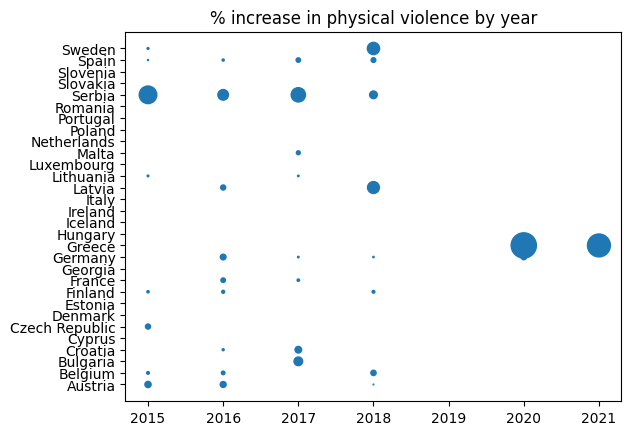

<Figure size 500x500 with 0 Axes>

In [214]:
ax = plt.scatter(data=df, y='Country', x='Year', s=df['physical_violence_pct_change']*3)
plt.title('% increase in physical violence by year')
plt.figure(figsize = (5,5))
plt.show()

In [216]:
# Countries with the biggest increace in PSYCOLOGICAL VIOLENCE FROM 2019 onward --- COVID
df[(df['psychological_violence_pct_change'].notna())&(df['Year']>2019)]\
.sort_values('psychological_violence_pct_change',ascending=False)\
[['Country','Year','psychological_violence_pct_change','psychological_violence']]

Country  Year  psychological_violence_pct_change  psychological_violence
152   Greece  2020                              104.6                  2906.0
153   Greece  2021                               84.1                  5350.0
309   Serbia  2021                                6.1                 10588.0
308   Serbia  2020                                3.4                  9983.0
140  Germany  2020                                1.5                 26905.0

/Users/atroboukis/Google Drive/iMEdD/PROJECTS/FEMICIDES/femicides/lib/python3.8/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


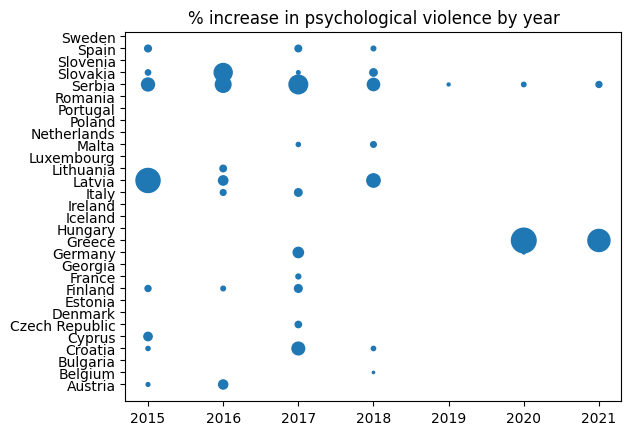

<Figure size 500x500 with 0 Axes>

In [70]:
ax = plt.scatter(data=df, y='Country', x='Year', s=df['psychological_violence_pct_change']*3)
plt.title('% increase in psychological violence by year')
plt.figure(figsize = (5,5))
plt.show()

In [217]:
# Countries with the biggest increace in ECONOMIC VIOLENCE FROM 2019 onward --- COVID
df[(df['economic_violence_pct_change'].notna())&(df['Year']>2019)]\
.sort_values('economic_violence_pct_change',ascending=False)\
[['Country','Year','economic_violence_pct_change','economic_violence']]

Country  Year  economic_violence_pct_change  economic_violence
140  Germany  2020                          12.7               71.0
308   Serbia  2020                           6.4              415.0
309   Serbia  2021                          -1.0              411.0

/Users/atroboukis/Google Drive/iMEdD/PROJECTS/FEMICIDES/femicides/lib/python3.8/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


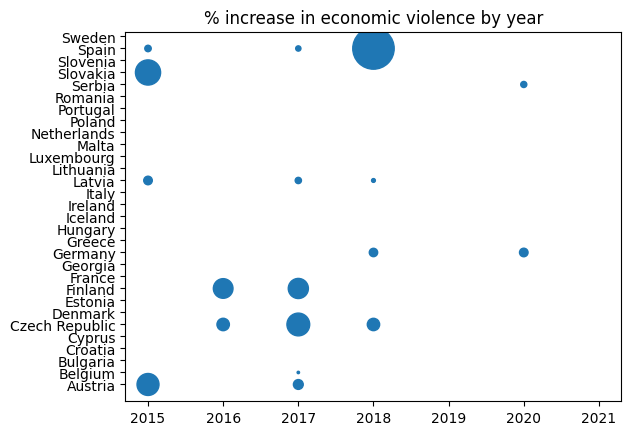

<Figure size 500x500 with 0 Axes>

In [72]:
ax = plt.scatter(data=df, y='Country', x='Year', s=df['economic_violence_pct_change']*3)
plt.title('% increase in economic violence by year')
plt.figure(figsize = (5,5))
plt.show()

In [219]:
# Countries with the biggest increace in SEXUAL VIOLENCE FROM 2019 onward --- COVID
df[(df['sexual_violence_pct_change'].notna())&(df['Year']>2019)]\
.sort_values('sexual_violence_pct_change',ascending=False)\
[['Country','Year','sexual_violence_pct_change','sexual_violence']]

Country  Year  sexual_violence_pct_change  sexual_violence
152   Greece  2020                       115.6             69.0
153   Greece  2021                       104.3            141.0
309   Serbia  2021                        76.0            176.0
164  Hungary  2020                        20.8           1157.0
140  Germany  2020                         8.0           2677.0
165  Hungary  2021                        -6.3           1084.0
308   Serbia  2020                       -52.6            100.0

/Users/atroboukis/Google Drive/iMEdD/PROJECTS/FEMICIDES/femicides/lib/python3.8/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


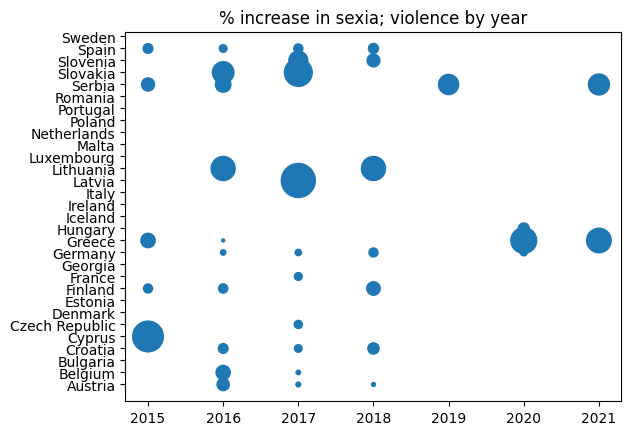

<Figure size 500x500 with 0 Axes>

In [74]:
ax = plt.scatter(data=df, y='Country', x='Year', s=df['sexual_violence_pct_change']*3)
plt.title('% increase in sexia; violence by year')
plt.figure(figsize = (5,5))
plt.show()

In [221]:
# Countries with the biggest increace in INTENTIONAL FEMALE HOMICIDES FROM 2019 onward --- COVID
df[(df['Intentional female homicides_pct_change'].notna())&(df['Year']>2019)]\
.sort_values('Intentional female homicides_pct_change',ascending=False)\
[['Country','Year','Intentional female homicides_pct_change','Intentional female homicides']]

Country  Year  Intentional female homicides_pct_change  Intentional female homicides
176         Iceland  2020                                      inf                           4.0
320        Slovakia  2020                                     86.7                          28.0
153          Greece  2021                                     83.3                          33.0
93          Estonia  2020                                     66.7                          10.0
332        Slovenia  2020                                     50.0                           6.0
58           Cyprus  2021                                     40.0                           7.0
45          Croatia  2020                                     35.7                          19.0
296         Romania  2020                                     35.2                          96.0
189         Ireland  2021                                     33.3                           8.0
224       Lithuania  2020                                     31.8                          29.0
140         Germany  2020                                     29.3                         357.0
164         Hungary  2020                                     25.8                          39.0
69   Czech Republic  2020                                     18.4                          58.0
33         Bulgaria  2020                                     13.0                          26.0
272          Poland  2020                                     11.3                          89.0
260     Netherlands  2020                                      4.8                          44.0
200           Italy  2020                                      4.5                         116.0
201           Italy  2021                                      2.6                         119.0
212          Latvia  2020                                      0.0                          42.0
333        Slovenia  2021                                      0.0                           6.0
356          Sweden  2020                                      0.0                          25.0
357          Sweden  2021                                     -4.0                          24.0
152          Greece  2020                                     -5.3                          18.0
344           Spain  2020                                     -5.6                         119.0
9           Austria  2020                                     -7.5                          37.0
345           Spain  2021                                     -9.2                         108.0
117          France  2020                                    -15.8                         240.0
261     Netherlands  2021                                    -15.9                          37.0
202           Italy  2022                                    -19.3                          96.0
308          Serbia  2020                                    -20.7                          23.0
188         Ireland  2020                                    -25.0                           6.0
70   Czech Republic  2021                                    -25.9                          43.0
46          Croatia  2021                                    -26.3                          14.0
81          Denmark  2020                                    -37.0                          17.0
57           Cyprus  2020                                    -50.0                           5.0
248           Malta  2020                                    -66.7                           1.0

/Users/atroboukis/Google Drive/iMEdD/PROJECTS/FEMICIDES/femicides/lib/python3.8/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


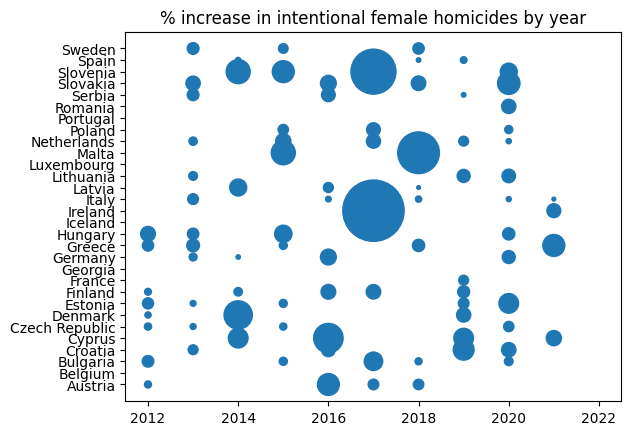

<Figure size 500x500 with 0 Axes>

In [76]:
ax = plt.scatter(data=df, y='Country', x='Year', s=df['Intentional female homicides_pct_change']*3)
plt.title('% increase in intentional female homicides by year')
plt.figure(figsize = (5,5))
plt.show()

In [77]:
# Countries with the biggest increace in VICTIMS OF INTIMATE VIOLENCE FROM 2019 onward --- COVID
df_long[(df_long['variable']=='vic_intimate_violence_pct_change')&(df_long['Year']>2019)&(df_long['value'].notna())].sort_values('value',ascending=False)

NameError: name 'df_long' is not defined

/Users/atroboukis/Google Drive/iMEdD/PROJECTS/FEMICIDES/femicides/lib/python3.8/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


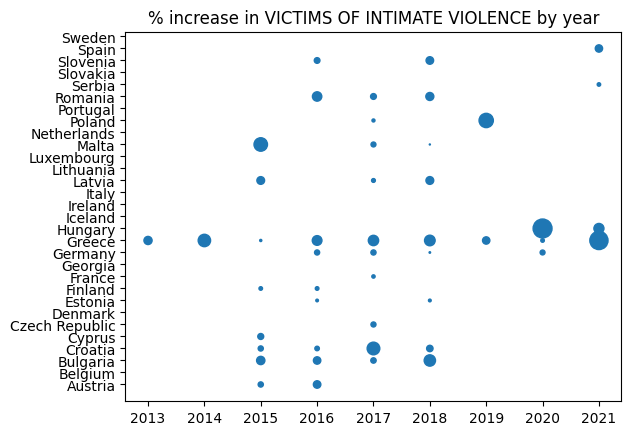

<Figure size 500x500 with 0 Axes>

In [78]:
ax = plt.scatter(data=df, y='Country', x='Year', s=df['vic_intimate_violence_pct_change']*3)
plt.title('% increase in VICTIMS OF INTIMATE VIOLENCE by year')
plt.figure(figsize = (5,5))
plt.show()

In [79]:
# Countries with the biggest increace in REPORTED OFFENCES OF INTIMATE VIOLENCE FROM 2019 onward --- COVID
df_long[(df_long['variable']=='reported_offences_int_violence_pct_change')&(df_long['Year']>2019)&(df_long['value'].notna())].sort_values('value',ascending=False)

NameError: name 'df_long' is not defined

In [80]:
# Countries with the biggest increace in MEN HELD IN PRISON FROM 2019 onward --- COVID
df_long[(df_long['variable']=='men_held_in_prison_pct_change')&(df_long['Year']>2019)&(df_long['value'].notna())].sort_values('value',ascending=False)

NameError: name 'df_long' is not defined

In [81]:
# Countries with the biggest increace in PROTECTION ORDERS FROM 2019 onward --- COVID
df_long[(df_long['variable']=='protection_orders_pct_change')&(df_long['Year']>2019)&(df_long['value'].notna())].sort_values('value',ascending=False)

NameError: name 'df_long' is not defined

In [82]:
# Countries with the biggest increace in MEN PROSECUTED FROM 2019 onward --- COVID
df_long[(df_long['variable']=='men_prosecuted_for_int_violence_pct_change')&(df_long['Year']>2019)&(df_long['value'].notna())].sort_values('value',ascending=False)

NameError: name 'df_long' is not defined

/Users/atroboukis/Google Drive/iMEdD/PROJECTS/FEMICIDES/femicides/lib/python3.8/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


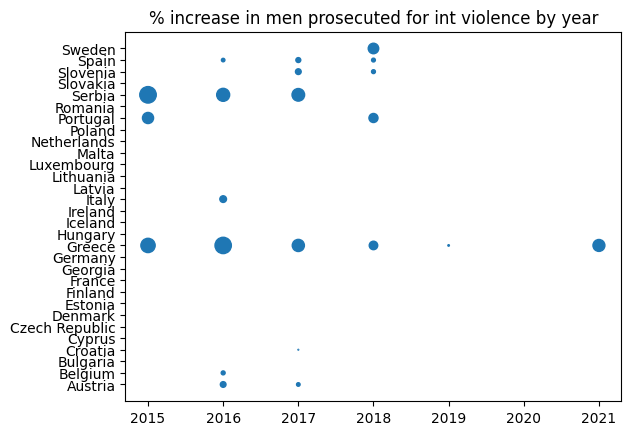

<Figure size 500x500 with 0 Axes>

In [83]:
ax = plt.scatter(data=df, y='Country', x='Year', s=df['men_prosecuted_for_int_violence_pct_change']*3)
plt.title('% increase in men prosecuted for int violence by year')
plt.figure(figsize = (5,5))
plt.show()

In [84]:
# Countries with the biggest increace in MEN SENTENCED FROM 2019 onward --- COVID
df_long[(df_long['variable']=='men_sentenced_pct_change')&(df_long['Year']>2019)&(df_long['value'].notna())].sort_values('value',ascending=False)

NameError: name 'df_long' is not defined

In [ ]:
ax = plt.scatter(data=df, y='Country', x='Year', s=df['men_sentenced_pct_change']*3)
plt.title('% increase in men sentenced for int violence by year')
plt.figure(figsize = (5,5))
plt.show()

In [85]:
# Countries with the biggest increace in MEN PERPETRATORS FROM 2019 onward --- COVID
df_long[(df_long['variable']=='men_perpetrators_int_violence_pct_change')&(df_long['Year']>2019)&(df_long['value'].notna())].sort_values('value',ascending=False)

NameError: name 'df_long' is not defined

/Users/atroboukis/Google Drive/iMEdD/PROJECTS/FEMICIDES/femicides/lib/python3.8/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


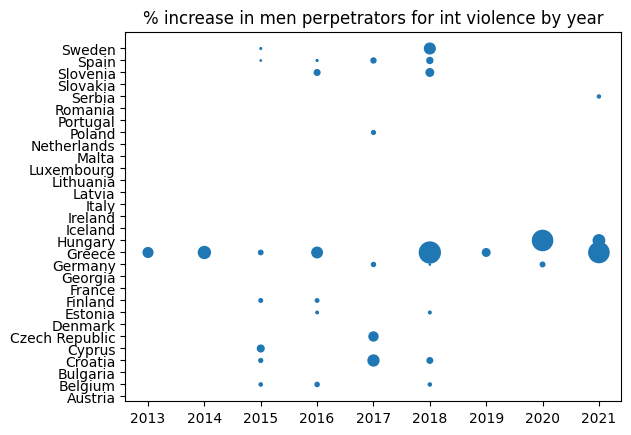

<Figure size 500x500 with 0 Axes>

In [86]:
ax = plt.scatter(data=df, y='Country', x='Year', s=df['men_perpetrators_int_violence_pct_change']*3)
plt.title('% increase in men perpetrators for int violence by year')
plt.figure(figsize = (5,5))
plt.show()

In [87]:
# List with all the variables to compare the countries
[item for item in list(set(df_long.variable.tolist())) if item.endswith('_pct_change')]

NameError: name 'df_long' is not defined

# Missing data

In [88]:
# 10 countries with the most nan values in total
df_long['missing_values'] = pd.isna(df_long.value)
missing_values = df_long.groupby(['Country']).missing_values.value_counts(dropna=False).to_frame().unstack().droplevel(0, axis=1).reset_index()[['Country',True]].sort_values(by=True, ascending=False).reset_index(drop=True)
missing_values.head(10)

NameError: name 'df_long' is not defined

In [89]:
# Missing values by country and year
missing_per_year = df_long.groupby(['Country','Year']).missing_values.value_counts(dropna=False).to_frame().unstack().droplevel(0, axis=1).reset_index()

NameError: name 'df_long' is not defined

In [90]:
missing_per_year['pct_missing'] = round((missing_per_year[True]/(missing_per_year[True]+missing_per_year[False]))*100,1)

NameError: name 'missing_per_year' is not defined

In [91]:
# Missing data per country and year. The darker, lighter the more data missing
dfw = pd.pivot(missing_per_year, index='Country', columns='Year', values='pct_missing')
plt.pcolor(dfw, cmap='RdBu_r', vmin=0, vmax=100)
plt.yticks(np.arange(0.5, len(dfw.index), 1), dfw.index)
plt.xticks(np.arange(0.5, len(dfw.columns), 1), dfw.columns)
plt.figure(figsize = (5,5))
plt.show()

NameError: name 'missing_per_year' is not defined

# Analysis on men perpertators
A lack of comparability between jurisdictions’
data on male perpetrators sentenced
(indicator 12) is due to the use of the number of
convictions (42), the number of cases (43) and the
number of inquiries resulting in an indictment (44)
as a unit of analysis, instead of male perpetrators.

<i> EIGE page 33</i>

Comparable countries for indicator 3:
- Belgium, Czechia, Slovenia, Finland, Sweden

For indicators 11,12,13 <i>(EIGE page 23, comments 24 & 25)</i>
- Greece, Croatia, Italy, Austria, Portugal, Slovenia and the United Kingdom the data collected does not adhere to EIGE’s indicator because they relate to domestic violence

- These Member States collect data on domestic violence offences within the intimate relationship: Belgium; Czechia, which excludes economic violence from the definition; Estonia, where the definition is almost limited to physical violence – damage to the health of another person and physical abuse that causes pain committed in a close relationship or relationship of subordination; and France, where the term is defined as violence conjugales.

In [92]:
def check_data(value):
    return value if ~np.isnan(value) else '(NO DATA)'

def perpetrators(country, year):
    pct_sentenced_from_prosecuted = df.loc[(df['Country']==country)& (df['Year']==year)]['pct_sentenced_from_prosecuted'].item()
    pct_prison_from_sentenced = df.loc[(df['Country']==country)& (df['Year']==year)]['pct_prison_from_sentenced'].item()
    pct_prison_from_prosecuted = df.loc[(df['Country']==country)& (df['Year']==year)]['pct_prison_from_prosecuted'].item()
        
    report = f"In {country}, in {year}, {check_data(pct_sentenced_from_prosecuted)}% of the male pepretrators who were prosecuted were convicted,\
    of whom {check_data(pct_prison_from_sentenced)}% where jailed.\
    This means that {check_data(pct_prison_from_prosecuted)}% of the male perpetratros who were prosecuted ended up in jail."
    
    return report
    

In [93]:
# text results generator - We exclude Croatia because the data are skewed

years = range(2010,2022,1)
countries = list(set(df.Country.tolist()))
results = []
for year in years:
    for country in countries:
        
        text = {}
        try:
            a = df.loc[(df.Year==year)&(df.Country==country)].pct_prison_from_prosecuted.item()
            if ~np.isnan(a) and country != 'Croatia':
                text['Country']=country
                text['Year'] = year
                text['Text'] = perpetrators(country, year)
                results.append(text)
        except ValueError:
            pass
#         
results

[{'Country': 'Slovenia',
  'Year': 2014,
  'Text': 'In Slovenia, in 2014, 33.2% of the male pepretrators who were prosecuted were convicted,    of whom 14.6% where jailed.    This means that 4.8% of the male perpetratros who were prosecuted ended up in jail.'},
 {'Country': 'Slovenia',
  'Year': 2015,
  'Text': 'In Slovenia, in 2015, 40.3% of the male pepretrators who were prosecuted were convicted,    of whom 15.2% where jailed.    This means that 6.1% of the male perpetratros who were prosecuted ended up in jail.'},
 {'Country': 'Spain',
  'Year': 2015,
  'Text': 'In Spain, in 2015, 52.3% of the male pepretrators who were prosecuted were convicted,    of whom 56.1% where jailed.    This means that 29.3% of the male perpetratros who were prosecuted ended up in jail.'},
 {'Country': 'Greece',
  'Year': 2016,
  'Text': 'In Greece, in 2016, 21.9% of the male pepretrators who were prosecuted were convicted,    of whom 16.4% where jailed.    This means that 3.6% of the male perpetratros wh

In [94]:
# Κατηγοριοποίηση με βάση το ποσοστό των θυτών που καταλήγουν στη φυλακή
df.sort_values(by='pct_prison_from_prosecuted', )[['Country','Year','pct_prison_from_prosecuted']]

Country  Year  pct_prison_from_prosecuted
151          Greece  2019                         1.9
150          Greece  2018                         2.0
149          Greece  2017                         2.9
152          Greece  2020                         2.9
153          Greece  2021                         3.2
148          Greece  2016                         3.6
330        Slovenia  2018                         4.4
329        Slovenia  2017                         4.4
326        Slovenia  2014                         4.8
331        Slovenia  2019                         5.3
327        Slovenia  2015                         6.1
328        Slovenia  2016                         6.4
222       Lithuania  2018                        21.0
40          Croatia  2015                        21.5
41          Croatia  2016                        21.7
39          Croatia  2014                        22.5
42          Croatia  2017                        22.7
43          Croatia  2018                        22.9
339           Spain  2015                        29.3
340           Spain  2016                        29.6
341           Spain  2017                        30.3
342           Spain  2018                        31.0
318        Slovakia  2018                        52.3
0           Austria  2011                         NaN
1           Austria  2012                         NaN
2           Austria  2013                         NaN
3           Austria  2014                         NaN
4           Austria  2015                         NaN
5           Austria  2016                         NaN
6           Austria  2017                         NaN
7           Austria  2018                         NaN
8           Austria  2019                         NaN
9           Austria  2020                         NaN
10          Austria  2021                         NaN
11          Austria  2022                         NaN
12          Belgium  2011                         NaN
13          Belgium  2012                         NaN
14          Belgium  2013                         NaN
15          Belgium  2014                         NaN
16          Belgium  2015                         NaN
17          Belgium  2016                         NaN
18          Belgium  2017                         NaN
19          Belgium  2018                         NaN
20          Belgium  2019                         NaN
21          Belgium  2020                         NaN
22          Belgium  2021                         NaN
23          Belgium  2022                         NaN
24         Bulgaria  2011                         NaN
25         Bulgaria  2012                         NaN
26         Bulgaria  2013                         NaN
27         Bulgaria  2014                         NaN
28         Bulgaria  2015                         NaN
29         Bulgaria  2016                         NaN
30         Bulgaria  2017                         NaN
31         Bulgaria  2018                         NaN
32         Bulgaria  2019                         NaN
33         Bulgaria  2020                         NaN
34         Bulgaria  2021                         NaN
35         Bulgaria  2022                         NaN
36          Croatia  2011                         NaN
37          Croatia  2012                         NaN
38          Croatia  2013                         NaN
44          Croatia  2019                         NaN
45          Croatia  2020                         NaN
46          Croatia  2021                         NaN
47          Croatia  2022                         NaN
48           Cyprus  2011                         NaN
49           Cyprus  2012                         NaN
50           Cyprus  2013                         NaN
51           Cyprus  2014                         NaN
52           Cyprus  2015                         NaN
53           Cyprus  2016                         NaN
54           Cyprus  2017                         NaN
55           Cyp

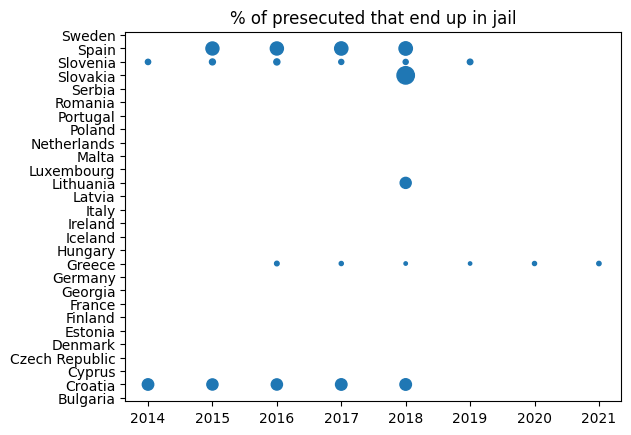

<Figure size 500x500 with 0 Axes>

In [95]:
ax = plt.scatter(data=df, y='Country', x='Year', s=df['pct_prison_from_prosecuted']*3)
plt.title('% of presecuted that end up in jail')
plt.figure(figsize = (5,5))
plt.show()

In [96]:
# Κατηγοριοποίηση με βάση το ποσοστό των θυτών που οδηγούνται στη δικαιοσύνη

df.sort_values(by='pct_sentenced_from_prosecuted')[['Country','Year','pct_sentenced_from_prosecuted']]

Country  Year  pct_sentenced_from_prosecuted
4           Austria  2015                           11.9
194           Italy  2014                           12.2
6           Austria  2017                           12.3
5           Austria  2016                           13.6
196           Italy  2016                           13.8
195           Italy  2015                           14.2
7           Austria  2018                           14.7
150          Greece  2018                           19.2
152          Greece  2020                           20.9
148          Greece  2016                           21.9
149          Greece  2017                           22.0
329        Slovenia  2017                           29.4
331        Slovenia  2019                           30.7
330        Slovenia  2018                           31.3
151          Greece  2019                           32.2
326        Slovenia  2014                           33.2
328        Slovenia  2016                           35.4
64   Czech Republic  2015                           38.9
327        Slovenia  2015                           40.3
65   Czech Republic  2016                           43.6
63   Czech Republic  2014                           43.9
222       Lithuania  2018                           44.0
67   Czech Republic  2018                           44.8
66   Czech Republic  2017                           45.3
339           Spain  2015                           52.3
340           Spain  2016                           54.8
341           Spain  2017                           55.0
342           Spain  2018                           55.3
318        Slovakia  2018                           90.3
112          France  2015                           94.5
113          France  2016                          100.2
114          France  2017                          100.4
39          Croatia  2014                          171.3
40          Croatia  2015                          179.3
278        Portugal  2014                          194.0
42          Croatia  2017                          195.5
41          Croatia  2016                          199.4
43          Croatia  2018                          206.4
280        Portugal  2016                          253.3
279        Portugal  2015                          254.1
282        Portugal  2018                          276.8
281        Portugal  2017                          279.8
0           Austria  2011                            NaN
1           Austria  2012                            NaN
2           Austria  2013                            NaN
3           Austria  2014                            NaN
8           Austria  2019                            NaN
9           Austria  2020                            NaN
10          Austria  2021                            NaN
11          Austria  2022                            NaN
12          Belgium  2011                            NaN
13          Belgium  2012                            NaN
14          Belgium  2013                            NaN
15          Belgium  2014                            NaN
16          Belgium  2015                            NaN
17          Belgium  2016                            NaN
18          Belgium  2017                            NaN
19          Belgium  2018                            NaN
20          Belgium  2019                            NaN
21          Belgium  2020                            NaN
22          Belgium  2021                            NaN
23          Belgium  2022                            NaN
24         Bulgaria  2011                            NaN
25         Bulgaria  2012                            NaN
26         Bulgaria  2013                            NaN
27         Bulgaria  2014                            NaN
28         Bulgaria  2015                            NaN
29         Bulgaria  2016                            NaN
30         Bulgaria  2017                            NaN
31         Bulgaria  2

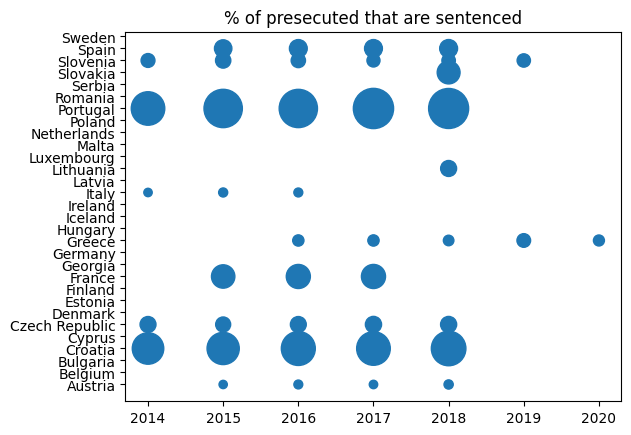

<Figure size 500x500 with 0 Axes>

In [97]:
ax = plt.scatter(data=df, y='Country', x='Year', s=df['pct_sentenced_from_prosecuted']*3)
plt.title('% of presecuted that are sentenced')
plt.figure(figsize = (5,5))
plt.show()

# AUTO GENERATED TEXT

In [98]:
def extract_info(df, location, value):
    return df.iloc[location][value]

In [99]:
",    ".join(df.columns.tolist())

'country_code,    Country,    Year,    Population,    female_population,    Deaths,    Female deaths,    Female assaults deaths,    Intentional female homicides,    vic_intimate_violence,    reported_offences_int_violence,    men_perpetrators_int_violence,    physical_violence,    psychological_violence,    sexual_violence,    economic_violence,    rape_victims,    femicides,    homicide_total,    pct of femicides to female homicide victims,    protection_orders,    men_prosecuted_for_int_violence,    men_sentenced,    men_held_in_prison,    Intentional female homicides_pct_change,    vic_intimate_violence_pct_change,    reported_offences_int_violence_pct_change,    men_perpetrators_int_violence_pct_change,    physical_violence_pct_change,    psychological_violence_pct_change,    sexual_violence_pct_change,    economic_violence_pct_change,    rape_victims_pct_change,    femicides_pct_change,    homicide_total_pct_change,    protection_orders_pct_change,    men_prosecuted_for_int_violen

In [100]:
# Countries we are examining
num_countries = len(list(set(df.Country.tolist())))

In [101]:
# Years we are examining
years = sorted(list(set(df.Year.tolist())))
years

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [102]:
# Years with values of femicides_pct_change
y = sorted(df[df['femicides_pct_change'].notna()].Year.unique())
y

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [103]:
# Years with values of femicides
yf = sorted(df[df['femicides'].notna()].Year.unique())
yf

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [104]:
# Number of countries with values of femicides
c = len(df[df['femicides'].notna()].Country.unique())

In [105]:
# Examine for which years we have more data
for item in y:
    result={}
    results = len(df[(df['Year']==item) & (df['femicides_pct_change'].notna())])
    print(item, " ", results)

2012   1
2013   1
2014   1
2015   15
2016   16
2017   16
2018   16
2019   6
2020   7
2021   6


In [106]:
# Find which countries have data for the three years 2016 - 2018
filtered_countries = df[(df['Year']>2015) & (df['Year']<2019) & (df['femicides_pct_change'].notna())]\
[['Country', 'Year', 'femicides_pct_change']]\
['Country'].value_counts().to_frame()


In [107]:
# comparable countries for the years 2016-18
comparable_countries = filtered_countries[filtered_countries['Country']>2].index.tolist()

In [108]:
df[(df.Year==2019) & (df.femicides.notna())].Country.unique()

array(['Cyprus', 'Germany', 'Greece', 'Hungary', 'Italy', 'Serbia',
       'Slovenia', 'Sweden'], dtype=object)

In [109]:
df[(df.Year==2020) & (df.femicides.notna())].Country.unique()

array(['Cyprus', 'Germany', 'Greece', 'Hungary', 'Italy', 'Serbia',
       'Sweden'], dtype=object)

In [110]:
df[(df.Year==2021) & (df.femicides.notna())].Country.unique()

array(['Cyprus', 'Greece', 'Hungary', 'Italy', 'Serbia', 'Sweden'],
      dtype=object)

### comparing femicides between a selected list of countries (EIGE)

In [111]:
# Countries which can be compared in femicides according to EIGE. We exclude Malta because
# it distorts the data due to the small number of recorded cases
comparable_femicides_countries.remove('Malta')
comparable_femicides_countries

['Czechia',
 'Germany',
 'Spain',
 'France',
 'Italy',
 'Latvia',
 'Lithuania',
 'Netherlands',
 'Slovenia',
 'Slovakia',
 'Finland',
 'Sweden']

In [112]:
# filtering our dataset to include only these countries
comparable_femicides = df[(df['Country'].isin(comparable_femicides_countries)) \
                          & (df['femicides_pct_change'].notna())]\
                            .reset_index(drop=True).copy()



In [113]:
# sorting the dataframe by femicides per 100k female deaths
comparable_femicides = comparable_femicides.sort_values(by='femicides_per_100k', \
                            ascending=False)[['Country','Year','femicides_per_100k']]\
                            .reset_index(drop=True)

comparable_femicides

Country  Year  femicides_per_100k
0        Latvia  2015                73.1
1      Slovenia  2017                68.3
2     Lithuania  2015                66.5
3       Finland  2018                65.8
4      Slovenia  2015                59.6
5        Latvia  2018                52.7
6       Finland  2017                52.2
7      Slovenia  2016                50.3
8      Slovenia  2019                48.7
9        Sweden  2018                47.0
10       Latvia  2017                46.5
11       France  2017                42.6
12     Slovakia  2017                41.9
13       France  2016                41.4
14       France  2015                41.1
15      Finland  2016                40.7
16     Slovenia  2018                39.2
17       Sweden  2019                35.8
18    Lithuania  2016                34.0
19       Latvia  2016                33.5
20      Germany  2016                33.4
21       Sweden  2021                33.0
22      Germany  2017                30.9
23  Netherlands  2015                30.2
24        Spain  2015                28.7
25      Germany  2020                28.2
26  Netherlands  2016                27.3
27       Sweden  2020                26.7
28      Germany  2018                25.1
29      Germany  2019                24.7
30        Spain  2016                24.3
31        Italy  2016                24.0
32        Spain  2017                23.8
33        Spain  2018                23.7
34     Slovakia  2016                23.6
35  Netherlands  2017                23.2
36      Finland  2015                22.6
37        Italy  2018                22.4
38        Italy  2015                21.6
39        Italy  2019                20.4
40     Slovakia  2015                19.1
41     Slovakia  2018                19.0
42        Italy  2020                17.6
43        Italy  2017                16.5
44    Lithuania  2018                14.7
45    Lithuania  2017                14.5
46        Italy  2021                 NaN

In [114]:
df_wide = df[['Country','Year','femicides_pct_change']].pivot(index='Year', columns='Country', values='femicides_pct_change')
df_wide.head(2)

Country  Austria  Belgium  Bulgaria  Croatia  Cyprus  Czech Republic  Denmark  Estonia  Finland  France  Georgia  Germany  Greece  Hungary  Iceland  Ireland  Italy  Latvia  Lithuania  Luxembourg  Malta  Netherlands  Poland  Portugal  Romania  Serbia  Slovakia  Slovenia  Spain  Sweden
Year                                                                                                                                                                                                                                                                                        
2011         NaN      NaN       NaN      NaN     NaN             NaN      NaN      NaN      NaN     NaN      NaN      NaN     NaN      NaN      NaN      NaN    NaN     NaN        NaN         NaN    NaN          NaN     NaN       NaN      NaN     NaN       NaN       NaN    NaN     NaN
2012         NaN      NaN       NaN      NaN     NaN             NaN      NaN      NaN      NaN     NaN      NaN      NaN   -50.0      NaN      NaN      NaN    NaN     NaN        NaN         NaN    NaN          NaN     NaN       NaN      NaN     NaN       NaN       NaN    NaN     NaN

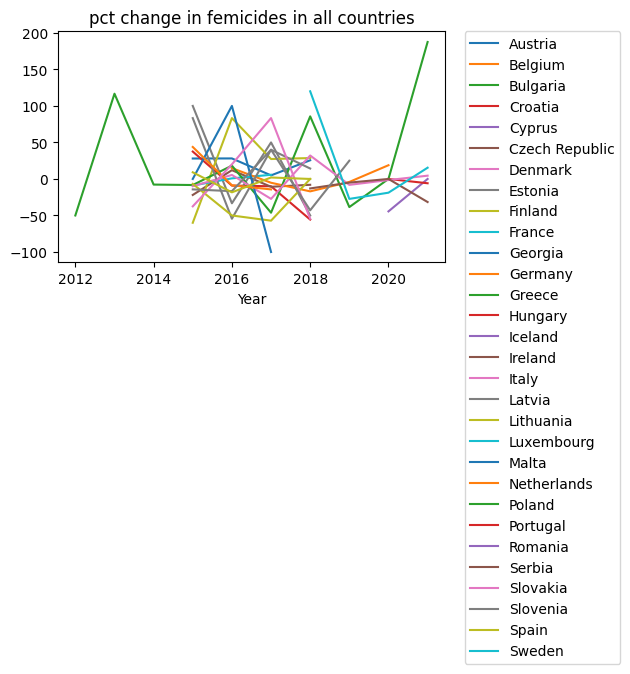

<Figure size 100x100 with 0 Axes>

In [115]:

ax = df_wide.plot(kind='line', figsize=(5, 3))
ax.set_title("pct change in femicides in all countries")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.figure(figsize=(1,1))

plt.show()

In [116]:
f"Amonght the countries that we can compare their femicides data \
(excluding Malta which records one or two femicides per year), \
{extract_info(comparable_femicides, 0, 'Country')} in {extract_info(comparable_femicides, 0, 'Year')} had the highest rate of femicides, with {extract_info(comparable_femicides, 0, 'femicides_per_100k')} femicides per 100k female deaths.\
It is followed by {extract_info(comparable_femicides, 1, 'Country')} which in {extract_info(comparable_femicides, 1, 'Year')} recorded {extract_info(comparable_femicides, 1, 'femicides_per_100k')} femicides per 100k female deaths.\
{extract_info(comparable_femicides, 2, 'Country')} and {extract_info(comparable_femicides, 3, 'Country')} follow with {extract_info(comparable_femicides, 2, 'femicides_per_100k')} and {extract_info(comparable_femicides, 3, 'femicides_per_100k')} in the years {extract_info(comparable_femicides, 2, 'Year')} and {extract_info(comparable_femicides, 3, 'Year')}, respectively."



'Amonght the countries that we can compare their femicides data (excluding Malta which records one or two femicides per year), Latvia in 2015 had the highest rate of femicides, with 73.1 femicides per 100k female deaths.It is followed by Slovenia which in 2017 recorded 68.3 femicides per 100k female deaths.Lithuania and Finland follow with 66.5 and 65.8 in the years 2015 and 2018, respectively.'

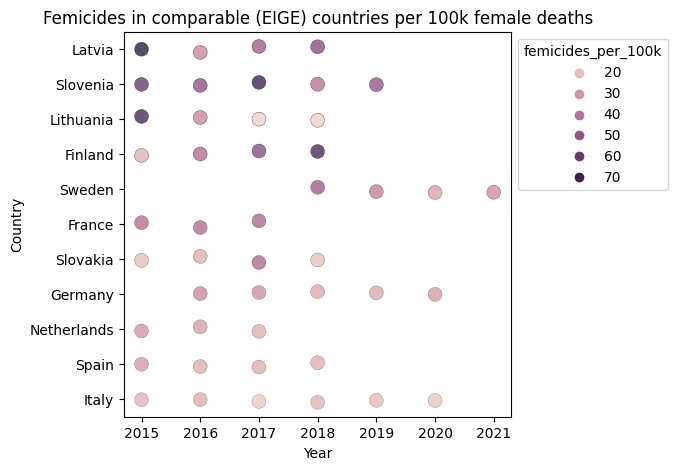

In [117]:
plt.figure(figsize = (5,5))
ax = sns.stripplot(data=comparable_femicides, x="Year", y="Country", 
              hue="femicides_per_100k",
              dodge=False, 
              jitter=True,
              s=10,
              marker="o", linewidth=.3, alpha=.80,native_scale=True
             )
# sns.set(rc = {'figure.figsize':(10,10)})
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Femicides in comparable (EIGE) countries per 100k female deaths")
palette = sns.color_palette("flare", as_cmap=True)


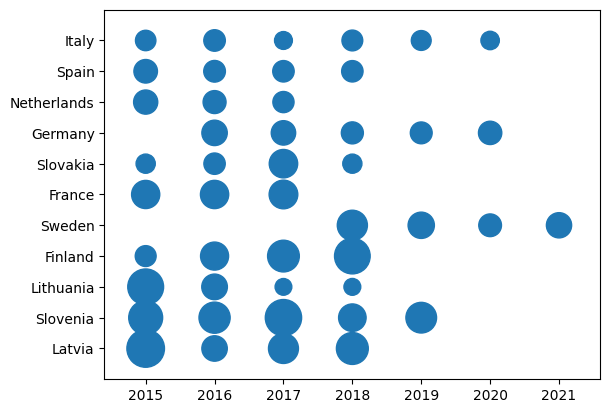

<Figure size 700x700 with 0 Axes>

In [118]:
comparable_femicides['viz_per_100k'] = comparable_femicides['femicides_per_100k']*10
ax = plt.scatter(data=comparable_femicides, y='Country', x='Year', s='viz_per_100k')
plt.margins(.1)
plt.figure(figsize = (7,7))
plt.show()

In [119]:
comparable_femicides

Country  Year  femicides_per_100k  viz_per_100k
0        Latvia  2015                73.1         731.0
1      Slovenia  2017                68.3         683.0
2     Lithuania  2015                66.5         665.0
3       Finland  2018                65.8         658.0
4      Slovenia  2015                59.6         596.0
5        Latvia  2018                52.7         527.0
6       Finland  2017                52.2         522.0
7      Slovenia  2016                50.3         503.0
8      Slovenia  2019                48.7         487.0
9        Sweden  2018                47.0         470.0
10       Latvia  2017                46.5         465.0
11       France  2017                42.6         426.0
12     Slovakia  2017                41.9         419.0
13       France  2016                41.4         414.0
14       France  2015                41.1         411.0
15      Finland  2016                40.7         407.0
16     Slovenia  2018                39.2         392.0
17       Sweden  2019                35.8         358.0
18    Lithuania  2016                34.0         340.0
19       Latvia  2016                33.5         335.0
20      Germany  2016                33.4         334.0
21       Sweden  2021                33.0         330.0
22      Germany  2017                30.9         309.0
23  Netherlands  2015                30.2         302.0
24        Spain  2015                28.7         287.0
25      Germany  2020                28.2         282.0
26  Netherlands  2016                27.3         273.0
27       Sweden  2020                26.7         267.0
28      Germany  2018                25.1         251.0
29      Germany  2019                24.7         247.0
30        Spain  2016                24.3         243.0
31        Italy  2016                24.0         240.0
32        Spain  2017                23.8         238.0
33        Spain  2018                23.7         237.0
34     Slovakia  2016                23.6         236.0
35  Netherlands  2017                23.2         232.0
36      Finland  2015                22.6         226.0
37        Italy  2018                22.4         224.0
38        Italy  2015                21.6         216.0
39        Italy  2019                20.4         204.0
40     Slovakia  2015                19.1         191.0
41     Slovakia  2018                19.0         190.0
42        Italy  2020                17.6         176.0
43        Italy  2017                16.5         165.0
44    Lithuania  2018                14.7         147.0
45    Lithuania  2017                14.5         145.0
46        Italy  2021                 NaN           NaN

In [120]:
countries_to_compare_before_after_covid = comparable_femicides[(comparable_femicides['Year']>2018) & (comparable_femicides['Year']<2022)].Country.unique()

In [121]:
countries_to_compare_before_after_covid

array(['Slovenia', 'Sweden', 'Germany', 'Italy'], dtype=object)

In [122]:
cmp = df[(df.Country.isin(countries_to_compare_before_after_covid)) & (df.Year.isin([2019, 2020,2021]))]


In [123]:
cmp = cmp[['Country', 'Year','femicides','femicides_per_1000000', 'femicides_per_100k', 'Female deaths','femicides_pct_change']].sort_values(by=['Country','Year'], ascending=True).dropna().reset_index(drop=True)

In [124]:
cmp = cmp.sort_values(by='femicides_pct_change',ascending=False).copy()

In [125]:
# function that will add the text increase or decrease based on the given number
def inc_dec(data1):
    '''
    This function will return the word 'increase' or 'decrease' depending 
    of the value that you'll feed it. If it's a negative value, it will return decrease.
    '''
    if isinstance(data1, float):
        if data1>0:
            return "increase"
        else:
            return 'decrease'
    else:
        return ""

In [126]:
# function that will calculate pct_change of each the give value of each country and year, from 2019 
def compare_to_2019(df,country,value,year):
    '''
    This function will return the pct_change between two values in 2019 and your given year
    df -> your dataframe
    country -> the country you want to examine (that is included in your dataframe)
    value -> the column name of your dataframe that you want to extract your value from
    year -> the year you want your value to reflect
    
    e.g. compare_to_2019(df, 'Greece','femicides',2021) will return the pct_change of 
    femicides in 2021 compared to 2019 (before the pandemic)
    '''
    try:
        before = df[(df['Year']==2019) & (df['Country']==country)][value].item()
        after = df[(df['Year']==year) & (df['Country']==country)][value].item()
        change = round(((after-before)/before)*100,1)
        return change
    except:
        return "no data"

In [127]:
# function that will get absolute number 
def abs_number(df,country,value,year):
    '''
    This function will return the value of a row of your dataframe.
    df -> your dataframe
    country -> the country you want to examine (that is included in your dataframe)
    value -> the column name of your dataframe that you want to extract your value from
    year -> the year you want your value to reflect
    e.g. abs_number(df, 'Greece','femicides',2019) will return the number of femicides in Greece in 2019
    '''
    try:
        number = df[(df['Year']==year) & (df['Country']==country)][value].item()
        return number
    except:
        return "no data"

In [128]:
comparable_countries_2020_2019 = f"Among the countries with comparable femicide data, we have data for before and after the pandemic \
for {len(countries_to_compare_before_after_covid)}, which are {', '.join(countries_to_compare_before_after_covid)}.\
 Of those {extract_info(cmp,0,'Country')} has the biggest increase with {extract_info(cmp,0,'femicides_pct_change')}% increase in\
 {extract_info(cmp,0,'Year')}, compared to {extract_info(cmp,0,'Year')-1}, the year before the pandemic.\
 {extract_info(cmp,1,'Country')} follows with {extract_info(cmp,1,'femicides_pct_change')}% {inc_dec(extract_info(cmp,1,'femicides_pct_change'))} {extract_info(cmp,1,'Year')}, compared to {extract_info(cmp,1,'Year')-1}.\
 The third country in the list is {extract_info(cmp,2,'Country')} with {extract_info(cmp,2,'femicides_pct_change')}% {inc_dec(extract_info(cmp,2,'femicides_pct_change'))} {extract_info(cmp,0,'Year')}, compared to {extract_info(cmp,2,'Year')-1}."

comparable_countries_2020_2019

'Among the countries with comparable femicide data, we have data for before and after the pandemic for 4, which are Slovenia, Sweden, Germany, Italy. Of those Slovenia has the biggest increase with 25.0% increase in 2019, compared to 2018, the year before the pandemic. Germany follows with 18.8% increase 2020, compared to 2019. The third country in the list is Sweden with 15.4% increase 2019, compared to 2020.'

In [129]:
def compare_to_2019_text(dataframe, list_of_countries, value):
    '''
    This function compares data to 2019. In order to work, you need to load the functions
    - compare_to_2019()
    - abs_number()
    e.g. It will compare the 'femicides' of 2020 to femicides of 2019, or femicides
    of 2021 to femicides to 2019.
    dataframe -> your dataframe
    list_of_countries -> list of the countries that exist in your dataframe
    value -> the column name that you want to compare to 2019
    '''
    results_compare_to_2019=[]
    for country in list_of_countries:
        for year in [2020, 2021]:
            number = compare_to_2019(dataframe, country, value,year)
            if isinstance(number,float) and ~np.isnan(number):
                result_countries = f'{country} in {year} had a {number}% ({abs_number(dataframe, country, value, year)}) {inc_dec(number)} in {value} compared to 2019 ({abs_number(dataframe, country, value, 2019)}).'
                results_compare_to_2019.append(result_countries)
            else:
                pass
    comparing_femicides_pct_change_compared_to_2019 = "\n".join(results_compare_to_2019)
    return comparing_femicides_pct_change_compared_to_2019


In [130]:
# Calling the compare_to_2019 function to print resutls only for the comparable (EIGE) countries
print(compare_to_2019_text(cmp, countries_to_compare_before_after_covid, 'femicides'))

Sweden in 2020 had a -18.8% (13.0) decrease in femicides compared to 2019 (16.0).
Sweden in 2021 had a -6.2% (15.0) decrease in femicides compared to 2019 (16.0).
Germany in 2020 had a 18.8% (139.0) increase in femicides compared to 2019 (117.0).
Italy in 2020 had a -1.5% (67.0) decrease in femicides compared to 2019 (68.0).


In [131]:
# Calling the function to print results for all the countries
print(compare_to_2019_text(df, df.Country.unique(), 'femicides'))

Cyprus in 2020 had a -44.4% (5.0) decrease in femicides compared to 2019 (9.0).
Cyprus in 2021 had a -44.4% (5.0) decrease in femicides compared to 2019 (9.0).
Germany in 2020 had a 18.8% (139.0) increase in femicides compared to 2019 (117.0).
Greece in 2020 had a 0.0% (8.0) decrease in femicides compared to 2019 (8.0).
Greece in 2021 had a 187.5% (23.0) increase in femicides compared to 2019 (8.0).
Hungary in 2020 had a 0.0% (17.0) decrease in femicides compared to 2019 (17.0).
Hungary in 2021 had a -5.9% (16.0) decrease in femicides compared to 2019 (17.0).
Italy in 2020 had a -1.5% (67.0) decrease in femicides compared to 2019 (68.0).
Italy in 2021 had a 2.9% (70.0) increase in femicides compared to 2019 (68.0).
Serbia in 2020 had a 0.0% (19.0) decrease in femicides compared to 2019 (19.0).
Serbia in 2021 had a -31.6% (13.0) decrease in femicides compared to 2019 (19.0).
Sweden in 2020 had a -18.8% (13.0) decrease in femicides compared to 2019 (16.0).
Sweden in 2021 had a -6.2% (15.

In [132]:
abs_number(df, 'Greece', 'rape_victims', 2020)

202.0

In [133]:
df.head()

country_code  Country  Year  Population  female_population   Deaths  Female deaths  Female assaults deaths  Intentional female homicides  vic_intimate_violence  reported_offences_int_violence  men_perpetrators_int_violence  physical_violence  psychological_violence  sexual_violence  economic_violence  rape_victims  femicides  homicide_total  pct of femicides to female homicide victims  protection_orders  men_prosecuted_for_int_violence  men_sentenced  men_held_in_prison  Intentional female homicides_pct_change  vic_intimate_violence_pct_change  reported_offences_int_violence_pct_change  men_perpetrators_int_violence_pct_change  physical_violence_pct_change  psychological_violence_pct_change  sexual_violence_pct_change  economic_violence_pct_change  rape_victims_pct_change  femicides_pct_change  homicide_total_pct_change  protection_orders_pct_change  men_prosecuted_for_int_violence_pct_change  men_sentenced_pct_change  men_held_in_prison_pct_change  vic_intimate_violence_per_10000  \
0           AT  Austria  2011     8375164                NaN  76142.0        39758.0                    21.0                          35.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN                                      NaN                               NaN                                        NaN                                       NaN                           NaN                                NaN                         NaN                           NaN                      NaN                   NaN                        NaN                           NaN                                         NaN                       NaN                            NaN                              NaN   
1           AT  Austria  2012     8408121          4309977.0  78961.0        41803.0                    21.0                          38.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN                                      8.6                               NaN                                        NaN                                       NaN                           NaN                                NaN                         NaN                           NaN                      NaN                   NaN                        NaN                           NaN                                         NaN                       NaN                            NaN                              NaN   
2           AT  Austria  2013     8451860          4328238.0  79020.0        41378.0                    23.0                          30.0                    NaN                             NaN                            NaN                NaN                     NaN              NaN                NaN           NaN        NaN             NaN                                          NaN                NaN                              NaN            NaN                 NaN                                    -21.1                               NaN                                        NaN                                       NaN                           NaN                                NaN                         NaN                           NaN                      NaN                   NaN                        NaN                           NaN                                         NaN                       NaN                            NaN                              NaN  

In [134]:
cmp

Country  Year  femicides  femicides_per_1000000  femicides_per_100k  Female deaths  femicides_pct_change
4  Slovenia  2019        5.0                   4.80                48.7        10266.0                  25.0
1   Germany  2020      139.0                   3.30                28.2       493503.0                  18.8
7    Sweden  2021       15.0                   2.91                33.0        45474.0                  15.4
3     Italy  2020       67.0                   2.19                17.6       380899.0                  -1.5
0   Germany  2019      117.0                   2.78                24.7       474536.0                  -4.1
2     Italy  2019       68.0                   2.22                20.4       333897.0                  -8.1
6    Sweden  2020       13.0                   2.53                26.7        48743.0                 -18.8
5    Sweden  2019       16.0                   3.14                35.8        44740.0                 -27.3

In [135]:
cmp[(cmp['Year']==2020) & (cmp['Country']=='Sweden')]['femicides_per_100k'].item()

26.7

In [136]:
# df[['Country','Year','femicides','femicides_pct_change']]\
# .replace(np.inf, 100)\
# .sort_values(by='femicides_pct_change', ascending=False)

## How many femicides have been recorded (total number)

In [137]:
total_num_femicides = f"We have data on femicides (any year) in {c} countries in Europe from {yf[0]} to {yf[-1]}. \
More than {round(df['femicides'].sum(),-2)} ({df['femicides'].sum()}) femicides have been recorded, \
according to our analysis. This number underrepresents reality due to the lack of data. "
total_num_femicides

'We have data on femicides (any year) in 20 countries in Europe from 2011 to 2021. More than 3200.0 (3207.0) femicides have been recorded, according to our analysis. This number underrepresents reality due to the lack of data. '

## Which country had the biggest increase in femicides compared to the previous year?

In [138]:
country_with_biggest_increase_in_femicides = df[['Country','Year','femicides','femicides_pct_change']]\
.replace(np.inf, 100)\
.sort_values(by='femicides_pct_change', ascending=False)


In [139]:
f"The country with the biggest increase in femicides was {country_with_biggest_increase_in_femicides.iloc[0].Country} \
with {country_with_biggest_increase_in_femicides.iloc[0].femicides_pct_change}% increase in \
{country_with_biggest_increase_in_femicides.iloc[0].Year} compared to \
{country_with_biggest_increase_in_femicides.iloc[0].Year-1}. \
{country_with_biggest_increase_in_femicides.iloc[1].Country} in {country_with_biggest_increase_in_femicides.iloc[1].Year} \
recorded a {country_with_biggest_increase_in_femicides.iloc[1].femicides_pct_change}% increase, \
while {country_with_biggest_increase_in_femicides.iloc[2].Country} and {country_with_biggest_increase_in_femicides.iloc[3].Country} had a \
{country_with_biggest_increase_in_femicides.iloc[2].femicides_pct_change}% and \
{country_with_biggest_increase_in_femicides.iloc[3].femicides_pct_change}% \
increase in {country_with_biggest_increase_in_femicides.iloc[2].Year} \
and {country_with_biggest_increase_in_femicides.iloc[3].Year}, respectively."

'The country with the biggest increase in femicides was Greece with 187.5% increase in 2021 compared to 2020. Sweden in 2018 recorded a 120.0% increase, while Greece and Estonia had a 116.7% and 100.0% increase in 2013 and 2015, respectively.'

## Out of 10  homicides of women (homicide_total) how many were femicides?

In [140]:
# To calculate for each country, all years on ever 10 homicides of women how many were femicides,
# we'll filter the dataset and exclude years that we have only one of the two values (femicides or homicides)
measure = 10
per_country_all_years = df[(df.femicides.notna()) & df.homicide_total.notna()][['Country','Year','femicides','homicide_total']]
per_country_all_years = per_country_all_years.groupby('Country')[['femicides','homicide_total']].sum().reset_index()
per_country_all_years['pct of femicides to female homicide victims'] = round((per_country_all_years['femicides']/per_country_all_years['homicide_total'])*measure,1)
per_country_all_years = per_country_all_years.sort_values(by='pct of femicides to female homicide victims', ascending=False)

country_one = extract_info(per_country_all_years, 0, 'Country')
country_two = extract_info(per_country_all_years, 1, 'Country')
country_three = extract_info(per_country_all_years, 2, 'Country')

one_fem = round(extract_info(per_country_all_years, 0, 'pct of femicides to female homicide victims'),)
two_fem = round(extract_info(per_country_all_years, 1, 'pct of femicides to female homicide victims'),)
three_fem = round(extract_info(per_country_all_years, 2, 'pct of femicides to female homicide victims'),)

out_of_10_homicides = f"It is estimated that {round((per_country_all_years['femicides'].sum()/per_country_all_years['homicide_total'].sum())*measure)} out of {measure} \
homicides of women are recorded as femicides. \
According to the data we have collected (link methodology), \
in {country_one}, almost {one_fem} out of {measure} homicides against women were femicides. \
In {country_two}, {two_fem} out of {measure} victims of homicide in total were femicides. \
In {country_three}, {three_fem} out of {measure} victims of homicide in total were femicides."

out_of_10_homicides

'It is estimated that 4 out of 10 homicides of women are recorded as femicides. According to the data we have collected (link methodology), in Cyprus, almost 9 out of 10 homicides against women were femicides. In Austria, 7 out of 10 victims of homicide in total were femicides. In Finland, 6 out of 10 victims of homicide in total were femicides.'

In [141]:
from dash import Dash, html, dcc,Input, Output
from jupyter_dash import JupyterDash
import plotly.express as px

In [142]:
app = JupyterDash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server()

Dash app running on http://127.0.0.1:8050/


In [ ]:
df.columns

In [ ]:
df.sort_values(by=['pct of femicides to female homicide victims'], ascending=False)[['Country','Year','femicides','pct of femicides to female homicide victims']]